# Etude de l'impact de la crise sanitaire sur les différents secteurs de Grand Est

## Sommaire

- [I. Présentation des données](#present_data)
    - [I.A Presentation des variables](#1.A)
    - [I.B Selection des variables](#1.B)
    - [I.C Transformations en séries temporelles](#1.C)
- [II. Univariate TS Analysis](#univariate)
    - [II.A Travail sur le nombre total d'établissements de Grand-Est](#univariateA)


In [26]:
suppressPackageStartupMessages(require(skimr))
suppressPackageStartupMessages(require(readxl))
suppressPackageStartupMessages(require(stringr))
suppressPackageStartupMessages(require(dplyr))<-
suppressPackageStartupMessages(require(ggplot2))
suppressPackageStartupMessages(require(forecast))
#suppressPackageStartupMessages(require(vars))

In [27]:
df <- read_excel("data/data.xlsx",sheet = 3)

<div id="present_data">

# I. Presentation des données et nettoyage

In [28]:
skim(df)

,skim_type,skim_variable,n_missing,complete_rate,character.min,character.max,character.empty,character.n_unique,character.whitespace,numeric.mean,numeric.sd,numeric.p0,numeric.p25,numeric.p50,numeric.p75,numeric.p100,numeric.hist
,<chr>,<chr>,<int>,<dbl>,<int>,<int>,<int>,<int>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
1,character,champ,0,1.00000000,3,14,0,7,0,NA,NA,NA,NA,NA,NA,NA,NA
2,character,type_aire,0,1.00000000,6,11,0,3,0,NA,NA,NA,NA,NA,NA,NA,NA
3,character,type_naf,0,1.00000000,7,11,0,7,0,NA,NA,NA,NA,NA,NA,NA,NA
4,character,aire,0,1.00000000,6,29,0,120,0,NA,NA,NA,NA,NA,NA,NA,NA
5,character,secteur,0,1.00000000,5,55,0,217,0,NA,NA,NA,NA,NA,NA,NA,NA
6,character,secret_stat,5361,0.05349576,11,11,0,1,0,NA,NA,NA,NA,NA,NA,NA,NA
7,numeric,nb_etab2010T1,303,0.94650424,NA,NA,NA,NA,NA,2274.569,23053.71,3,40,138,630,1507250,▇▁▁▁▁
8,numeric,nb_etab2010T2,303,0.94650424,NA,NA,NA,NA,NA,2300.447,23322.51,3,42,140,637,1525367,▇▁▁▁▁
9,numeric,nb_etab2010T3,303,0.94650424,NA,NA,NA,NA,NA,2303.091,23456.83,3,42,140,634,1535677,▇▁▁▁▁


── Data Summary ────────────────────────
                           Values
Name                       df    
Number of rows             5664  
Number of columns          144   
_______________________          
Column type frequency:           
  character                6     
  numeric                  138   
________________________         
Group variables            None  

── Variable type: character ────────────────────────────────────────────────────
  skim_variable n_missing complete_rate min max empty n_unique whitespace
1 champ                 0        1        3  14     0        7          0
2 type_aire             0        1        6  11     0        3          0
3 type_naf              0        1        7  11     0        7          0
4 aire                  0        1        6  29     0      120          0
5 secteur               0        1        5  55     0      217          0
6 secret_stat        5361        0.0535  11  11     0        1          0

── Variable type: 


<div id="1.A">

## I.A Presentation des données : Modalités des variables qualitatives

La base de données se compose de 6 variables qualitatives:
 - `champ` : ASSOCIATIONS, COOPERATIVES , ESS , ESS_PLUS, FONDATIONS, MUTUELLES , PRIVE HORS ESS
 - `type_aire` : DEPARTEMENT , FRANCE , NOUV_REGION
 - `type_naf` : NAF ASSO, NAF_ASSO_AG , NAF_COOPE, NAF_ESS, NAF_AUTRES, NAF_FOND, NAF_MUT
 - `aire`: Ensemble des département sous le format 01_AIN + modalité FRANCE + REGIONS : "44_GRAND EST"
 - `secteur` : Cas particulier les groupes de secteurs depende de l'air. Etant donnée qu'ici l'on va s'interesser exclusivement à l'echelle régionale : En voici les modalité : 
 - `secret_stat`: NA / secret_stat

<hr>

<div id="1.B">

## I.B Selection des données necessaires pour l'étude.

Notre problematique se pose dans un contexte précis : NOus voulons observer uniquement l'évolution des secteurs d'activité de Grand Est. Ainsi nous ne somme interessé que par une sous partie de cette table.
Ainsi selectionons la sous partie necessaire à notre étude.

In [29]:
tmp <-df%>% filter(aire=="44_GRAND EST" & champ=="ESS")

On obtient alors une table qui se compose de 28 serie temporelle differentes correspondant aux 27 secteurs d'activité différents + TOTAL . La nomenclature de ces secteurs d'activité est lié à nos précedent filtre sur le l'aire et le champ.
`type_naf`est alors fixé à `NAF_ESS`, `champ` a ESS , `type_aire` à NOUV_REGION , `aire` à GE 

In [30]:
skim(tmp)

,skim_type,skim_variable,n_missing,complete_rate,character.min,character.max,character.empty,character.n_unique,character.whitespace,numeric.mean,numeric.sd,numeric.p0,numeric.p25,numeric.p50,numeric.p75,numeric.p100,numeric.hist
,<chr>,<chr>,<int>,<dbl>,<int>,<int>,<int>,<int>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
1,character,champ,0,1.00000000,3,3,0,1,0,NA,NA,NA,NA,NA,NA,NA,NA
2,character,type_aire,0,1.00000000,11,11,0,1,0,NA,NA,NA,NA,NA,NA,NA,NA
3,character,type_naf,0,1.00000000,7,7,0,1,0,NA,NA,NA,NA,NA,NA,NA,NA
4,character,aire,0,1.00000000,12,12,0,1,0,NA,NA,NA,NA,NA,NA,NA,NA
5,character,secteur,0,1.00000000,5,55,0,28,0,NA,NA,NA,NA,NA,NA,NA,NA
6,character,secret_stat,27,0.03571429,11,11,0,1,0,NA,NA,NA,NA,NA,NA,NA,NA
7,numeric,nb_etab2010T1,1,0.96428571,NA,NA,NA,NA,NA,997.8148,2586.661,17,82.0,211,938.0,13471,▇▁▁▁▁
8,numeric,nb_etab2010T2,1,0.96428571,NA,NA,NA,NA,NA,1008.6296,2615.931,17,82.0,213,958.0,13617,▇▁▁▁▁
9,numeric,nb_etab2010T3,1,0.96428571,NA,NA,NA,NA,NA,1003.7407,2601.166,17,82.0,228,949.0,13551,▇▁▁▁▁


── Data Summary ────────────────────────
                           Values
Name                       tmp   
Number of rows             28    
Number of columns          144   
_______________________          
Column type frequency:           
  character                6     
  numeric                  138   
________________________         
Group variables            None  

── Variable type: character ────────────────────────────────────────────────────
  skim_variable n_missing complete_rate min max empty n_unique whitespace
1 champ                 0        1        3   3     0        1          0
2 type_aire             0        1       11  11     0        1          0
3 type_naf              0        1        7   7     0        1          0
4 aire                  0        1       12  12     0        1          0
5 secteur               0        1        5  55     0       28          0
6 secret_stat          27        0.0357  11  11     0        1          0

── Variable type: 

On observe qu'il ne reste dans notre table qu'un unique secret_stat

In [31]:
tmp[which(!is.na(tmp$secret_stat)),]

champ,type_aire,type_naf,aire,secteur,secret_stat,nb_etab2010T1,nb_etab2010T2,nb_etab2010T3,nb_etab2010T4,⋯,sal2019T1,sal2019T2,sal2019T3,sal2019T4,sal2020T1,sal2020T2,sal2020T3,sal2020T4,sal2021T1,sal2021T2
<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
ESS,NOUV_REGION,NAF_ESS,44_GRAND EST,ZZ_Non classé ailleurs,secret_stat,NA,NA,NA,NA,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA


Ce `NA` correspond à la modalité `ZZ_Non classé ailleurs` des secteurs d'activité que nous decidons donc d'exclure de l'étude.

In [32]:
df <-tmp[-which(!is.na(tmp$secret_stat)),]%>%select(-secret_stat)
df <- df %>% select(-champ,-type_aire,-type_naf,-aire)

In [33]:
skim(df)%>%head(1)

skim_type,skim_variable,n_missing,complete_rate,character.min,character.max,character.empty,character.n_unique,character.whitespace,numeric.mean,numeric.sd,numeric.p0,numeric.p25,numeric.p50,numeric.p75,numeric.p100,numeric.hist
<chr>,<chr>,<int>,<dbl>,<int>,<int>,<int>,<int>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
character,secteur,0,1,5,55,0,27,0,NA,NA,NA,NA,NA,NA,NA,NA


── Data Summary ────────────────────────
                           Values
Name                       df    
Number of rows             27    
Number of columns          139   
_______________________          
Column type frequency:           
  character                1     
________________________         
Group variables            None  

── Variable type: character ────────────────────────────────────────────────────
  skim_variable n_missing complete_rate min max empty n_unique whitespace
1 secteur               0             1   5  55     0       27          0


De plus nous nous interessons dans cette étude uniquement aux nombre d'établissement de chaque secteurs d'activités. AInsi debarassons nous des autres variables

In [34]:
df <- df[,c(TRUE,str_detect(colnames(df),"nb_etab")[-1])]
skim(df)

,skim_type,skim_variable,n_missing,complete_rate,character.min,character.max,character.empty,character.n_unique,character.whitespace,numeric.mean,numeric.sd,numeric.p0,numeric.p25,numeric.p50,numeric.p75,numeric.p100,numeric.hist
,<chr>,<chr>,<int>,<dbl>,<int>,<int>,<int>,<int>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
1,character,secteur,0,1,5,55,0,27,0,NA,NA,NA,NA,NA,NA,NA,NA
2,numeric,nb_etab2010T1,0,1,NA,NA,NA,NA,NA,997.8148,2586.661,17,82.0,211,938.0,13471,▇▁▁▁▁
3,numeric,nb_etab2010T2,0,1,NA,NA,NA,NA,NA,1008.6296,2615.931,17,82.0,213,958.0,13617,▇▁▁▁▁
4,numeric,nb_etab2010T3,0,1,NA,NA,NA,NA,NA,1003.7407,2601.166,17,82.0,228,949.0,13551,▇▁▁▁▁
5,numeric,nb_etab2010T4,0,1,NA,NA,NA,NA,NA,1006.7778,2610.584,17,83.0,212,964.0,13592,▇▁▁▁▁
6,numeric,nb_etab2011T1,0,1,NA,NA,NA,NA,NA,998.9259,2588.017,17,85.0,209,952.0,13486,▇▁▁▁▁
7,numeric,nb_etab2011T2,0,1,NA,NA,NA,NA,NA,1003.8148,2601.785,17,84.5,208,971.5,13552,▇▁▁▁▁
8,numeric,nb_etab2011T3,0,1,NA,NA,NA,NA,NA,994.7778,2577.770,17,85.0,221,954.0,13430,▇▁▁▁▁
9,numeric,nb_etab2011T4,0,1,NA,NA,NA,NA,NA,998.1111,2587.382,16,84.5,204,960.5,13475,▇▁▁▁▁


── Data Summary ────────────────────────
                           Values
Name                       df    
Number of rows             27    
Number of columns          47    
_______________________          
Column type frequency:           
  character                1     
  numeric                  46    
________________________         
Group variables            None  

── Variable type: character ────────────────────────────────────────────────────
  skim_variable n_missing complete_rate min max empty n_unique whitespace
1 secteur               0             1   5  55     0       27          0

── Variable type: numeric ──────────────────────────────────────────────────────
   skim_variable n_missing complete_rate  mean    sd p0  p25 p50   p75  p100
 1 nb_etab2010T1         0             1  998. 2587. 17 82   211  938  13471
 2 nb_etab2010T2         0             1 1009. 2616. 17 82   213  958  13617
 3 nb_etab2010T3         0             1 1004. 2601. 17 82   228  949  13551

### Revoir la nomenclature des secteur d'activité

In [35]:
moda.secteurs <-as.factor(df$secteur)%>%data.frame
colnames(moda.secteurs) <-"Modalité secteurs"
moda.secteurs

Modalité secteurs
<fct>
"64 Activités des services financiers, hors assurance et"
65-66 Assurance ; Activités auxiliaires de services fin
852 Enseignement primaire
853 Enseignement secondaire
85x Enseignement / Autre
861 Activités hospitalières
862 Activité des médecins et des dentistes
869 Autres activités pour la santé humaine
87 Hébergement médico-social et social


Le problème de cette classification est que cette dernière est trop détaillée en pensant d'ors et déjà a l'analyse multivarié : Garder un nombre tel de serie temporelles va poser un problème lors des futures estimations : **Fleau du nombre de dimension**

La réduction du nombre de dimension sera un passage obligatoire en ce qui concerne l'analyse des Serie temporelles en multivarié

<hr>

<div id="1.C">

## I.C Transformation en serie temporelles multivariées

In [36]:
tmp <- t(df)
colnames(tmp) <- tmp[1,]
tmp <-tmp[-1,]
df <- tmp
df


,"64 Activités des services financiers, hors assurance et",65-66 Assurance ; Activités auxiliaires de services fin,852 Enseignement primaire,853 Enseignement secondaire,85x Enseignement / Autre,861 Activités hospitalières,862 Activité des médecins et des dentistes,869 Autres activités pour la santé humaine,87 Hébergement médico-social et social,881 Action sociale sans hébergement pour personnes âgée,⋯,JA_Edition et audiovisuel,JB-JC_Télécommunications et ativités informatiques,LZ_Activités immobilières,"MA_Activités juridiques, de conseil et d'ingénierie",MB-MC_R&d et autres activités scientifiques et techniqu,NZ_Activités de services administratifs et de soutien,"RZ_Arts, spectacles et activités récréatives",SZ_autres activités de services,i_Industrie et agriculture,TOTAL
nb_etab2010T1,1290,355,70,156,1183,94,135,123,898,573,⋯,109,18,32,211,67,338,978,3087,49,13471
nb_etab2010T2,1284,354,72,156,1192,92,136,124,897,570,⋯,112,19,30,212,69,341,1019,3154,50,13617
nb_etab2010T3,1279,356,72,156,1147,92,148,126,902,572,⋯,109,19,32,205,71,346,996,3119,54,13551
nb_etab2010T4,1278,347,72,156,1185,94,139,125,905,573,⋯,112,19,32,199,71,345,1023,3133,51,13592
nb_etab2011T1,1276,393,71,155,1168,99,150,124,902,565,⋯,111,20,29,198,71,341,1002,3056,49,13486
nb_etab2011T2,1274,394,71,153,1179,98,151,125,908,561,⋯,110,17,29,204,69,346,1035,3107,47,13552
nb_etab2011T3,1269,392,72,157,1122,98,150,123,910,560,⋯,106,18,32,202,69,350,998,3094,50,13430
nb_etab2011T4,1267,392,70,150,1162,96,150,124,913,556,⋯,112,16,32,202,73,340,1008,3094,52,13475
nb_etab2012T1,1259,394,68,147,1169,96,152,125,910,549,⋯,108,15,32,199,75,335,995,3097,53,13443
nb_etab2012T2,1257,393,68,147,1173,97,154,126,919,551,⋯,108,17,32,199,72,334,1036,3149,53,13564


In [37]:
#------------------------
# Format Date variable

tmp <-df%>%as.data.frame
tmp <-cbind("date"=rep(NA,nrow(tmp)),tmp)
for (i in 1:nrow(tmp)){
    tmp.format.date <- strsplit(rownames(df)[i],"nb_etab")[[1]][2]
    subsplit <-strsplit(tmp.format.date,"T")[[1]]
    year<-subsplit[1]
    trimester <- subsplit[2]
    month <-switch(trimester,
        "1"="01",
        "2"="04",
        "3"="07",
        "4"="10"
    )
    tmp[i,1] <- paste(year,month,"01",sep="-")
}
tmp$date <-as.Date(tmp$date)
rownames(tmp) <- NULL
tmp

date,"64 Activités des services financiers, hors assurance et",65-66 Assurance ; Activités auxiliaires de services fin,852 Enseignement primaire,853 Enseignement secondaire,85x Enseignement / Autre,861 Activités hospitalières,862 Activité des médecins et des dentistes,869 Autres activités pour la santé humaine,87 Hébergement médico-social et social,⋯,JA_Edition et audiovisuel,JB-JC_Télécommunications et ativités informatiques,LZ_Activités immobilières,"MA_Activités juridiques, de conseil et d'ingénierie",MB-MC_R&d et autres activités scientifiques et techniqu,NZ_Activités de services administratifs et de soutien,"RZ_Arts, spectacles et activités récréatives",SZ_autres activités de services,i_Industrie et agriculture,TOTAL
<date>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,⋯,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
2010-01-01,1290,355,70,156,1183,94,135,123,898,⋯,109,18,32,211,67,338,978,3087,49,13471
2010-04-01,1284,354,72,156,1192,92,136,124,897,⋯,112,19,30,212,69,341,1019,3154,50,13617
2010-07-01,1279,356,72,156,1147,92,148,126,902,⋯,109,19,32,205,71,346,996,3119,54,13551
2010-10-01,1278,347,72,156,1185,94,139,125,905,⋯,112,19,32,199,71,345,1023,3133,51,13592
2011-01-01,1276,393,71,155,1168,99,150,124,902,⋯,111,20,29,198,71,341,1002,3056,49,13486
2011-04-01,1274,394,71,153,1179,98,151,125,908,⋯,110,17,29,204,69,346,1035,3107,47,13552
2011-07-01,1269,392,72,157,1122,98,150,123,910,⋯,106,18,32,202,69,350,998,3094,50,13430
2011-10-01,1267,392,70,150,1162,96,150,124,913,⋯,112,16,32,202,73,340,1008,3094,52,13475
2012-01-01,1259,394,68,147,1169,96,152,125,910,⋯,108,15,32,199,75,335,995,3097,53,13443


In [38]:
#---------------------------
#   Creation de plusieurs multivariate TS:
# df.ts : TS s'arretant avant la crise sanitaire
# Cette TS est elle meme redecoupées en 2.
# train.ts : TS d'apprentissage pour la construction des modeles
# test.ts : TS de test

# On a uassi global.ts contenant toutes les dates 

df.indexes <-which(tmp$date <= as.Date("2020-01-01"))
train.indexes<- which(tmp$date < as.Date("2018-01-01") )
test.indexes <-which(tmp$date>= as.Date("2018-01-01") & tmp$date <=as.Date("2020-01-01") )
tmp <-tmp %>%select(-date)%>% mutate_all(as.numeric)

In [39]:
df.indexes
train.indexes
test.indexes

[1]  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25
[26] 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41

[1]  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25
[26] 26 27 28 29 30 31 32

[1] 33 34 35 36 37 38 39 40 41

In [40]:
df.ts <- ts(tmp[df.indexes,],start=c(2010,1),frequency=4)# S'arrete à 2020 Q1
train.ts <-ts(tmp[train.indexes,],start=c(2010,1),frequency = 4)# S'arrete à 2017 Q4
test.ts <-ts(tmp[test.indexes,],start = c(2018,1),frequency = 4)# Commence a 2018 Q1 --> 2020 Q1
global.ts <- ts(tmp,start=c(2010,1),frequency=4)# Commence a 2010 Q1 --> 2021 Q2
covid.ts <- ts(tmp[(df.indexes[length(df.indexes)]+1):nrow(tmp),],start=c(2020,2),frequency = 4)# Commence a 2020 Q2 --> 2021 Q2 

Le but de cette division est de pouvoir regarder la pertinence de notre modèle sur des données observées relativement cohérente.
EN effet en regardant simplement la décomposition de la serie du total on se rend compte que la crise sanitaire correspond a un bruit enorme. Ainsi , dans un premier temps , on ne pourra pas regarder la pertinence des predictions de notre modèle basé sur la comparaison entre les val observée et prédites dans notre contexte. Ainsi on creer un nouvelle echantillon de test de notre modèle.
A noté que le modèle final sera bien evidemment construit à partir de `df.ts` et non `train.ts`.

<hr>


<div id="univariate">

# II. Univariate TS Analysis

Commencons par vizualiser les evolutions décrites par chacunes des séries Temporelles : 


In [17]:
#Le problème qui se pose est le suivant : Meme en univarié travaillé sur 27 series differentes n'est pas confortable. 
# Le regroupement est ici aussi necesaire.
dim(global.ts)

[1] 46 27

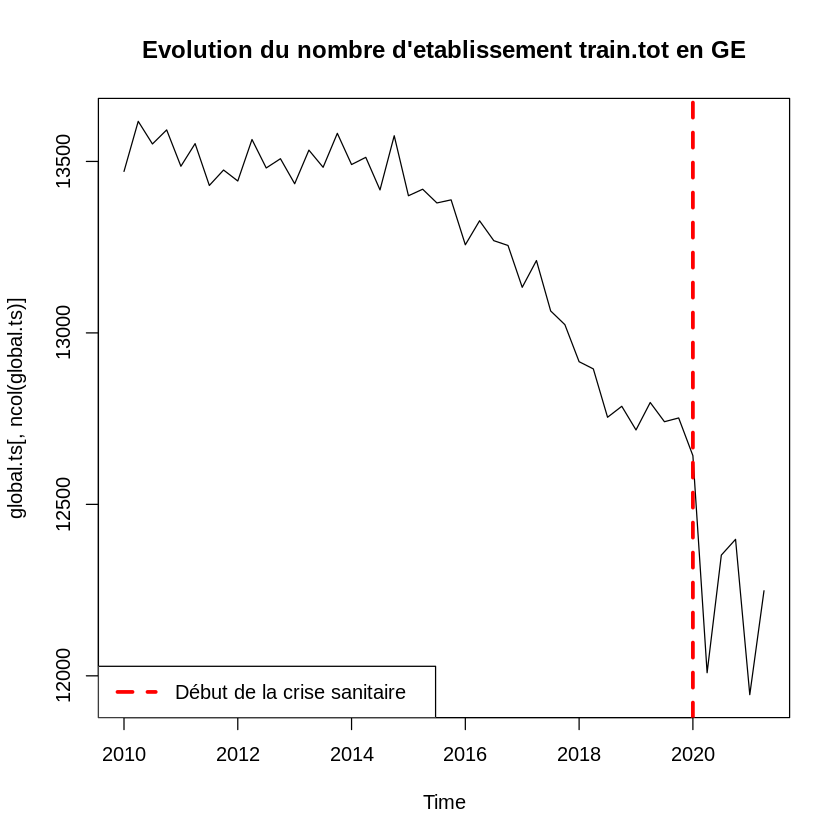

In [41]:
plot(global.ts[,ncol(global.ts)],main="Evolution du nombre d'etablissement train.tot en GE")
abline(v = 2020, col = "red",
                      lty =  2, lwd = 3)

legend(x = "bottomleft", lty = 2,  
       col= "red", lwd=3,
       legend="Début de la crise sanitaire")

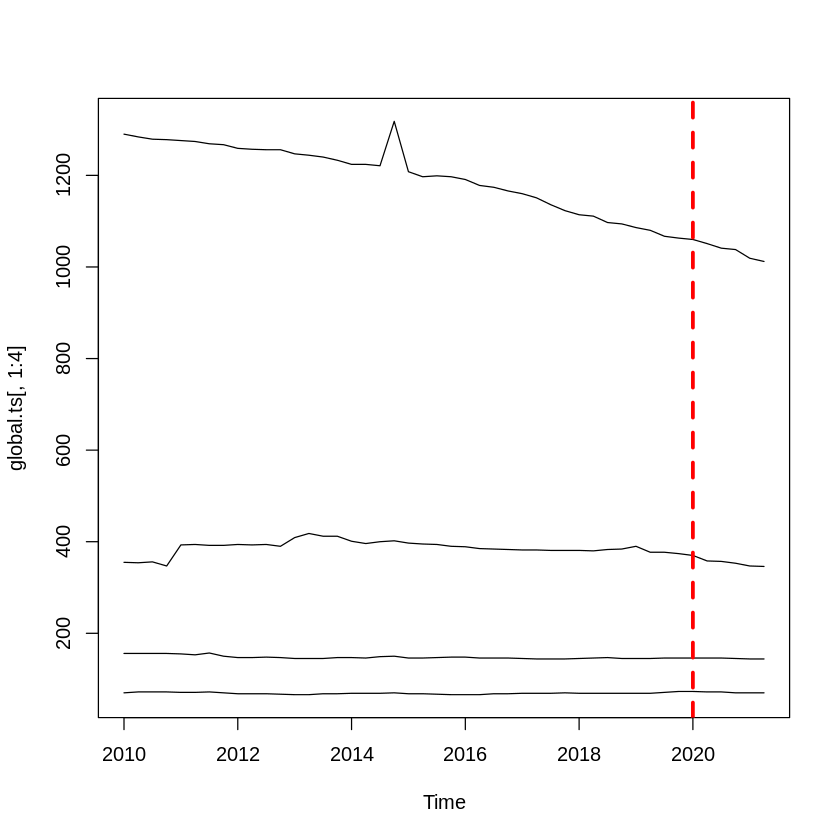

In [42]:

plot.ts(global.ts[,1:4],
plot.type="single")
abline(v = 2020, col = "red",
                      lty =  2, lwd = 3)


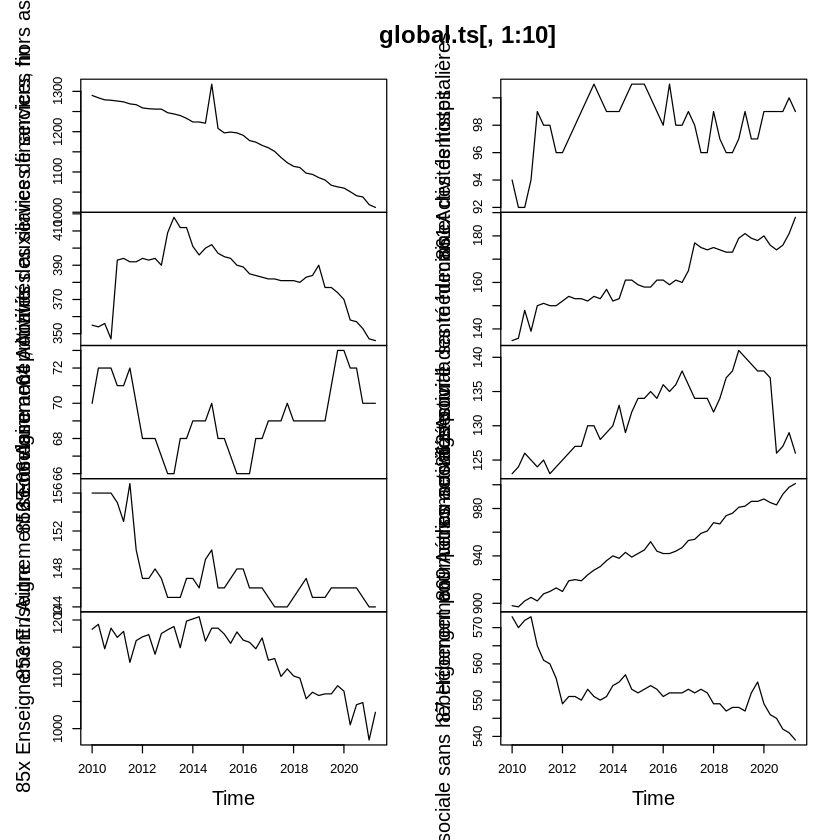

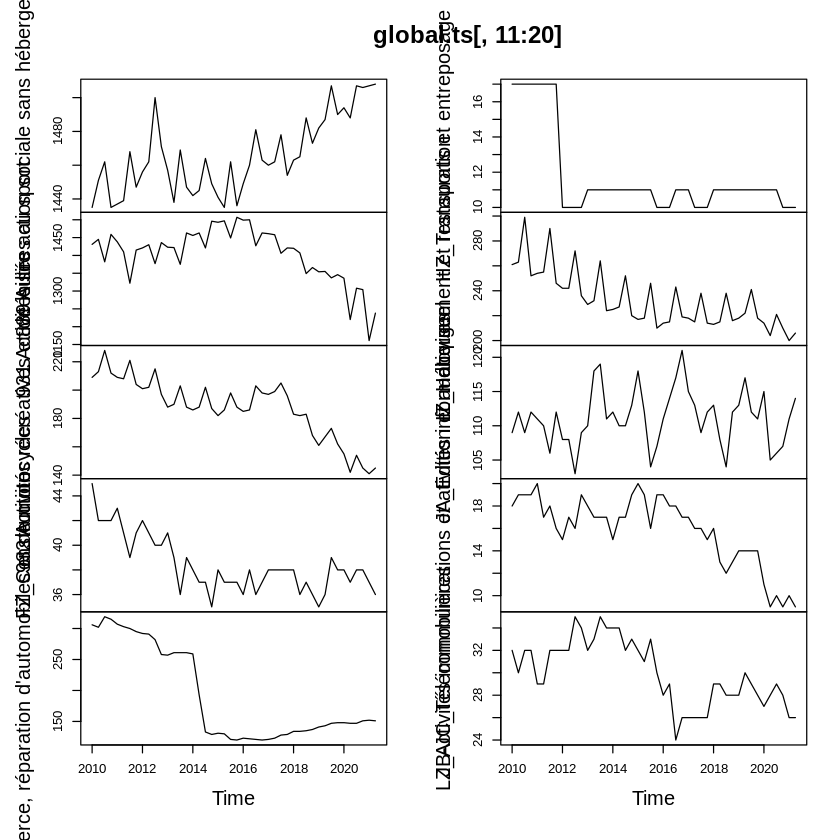

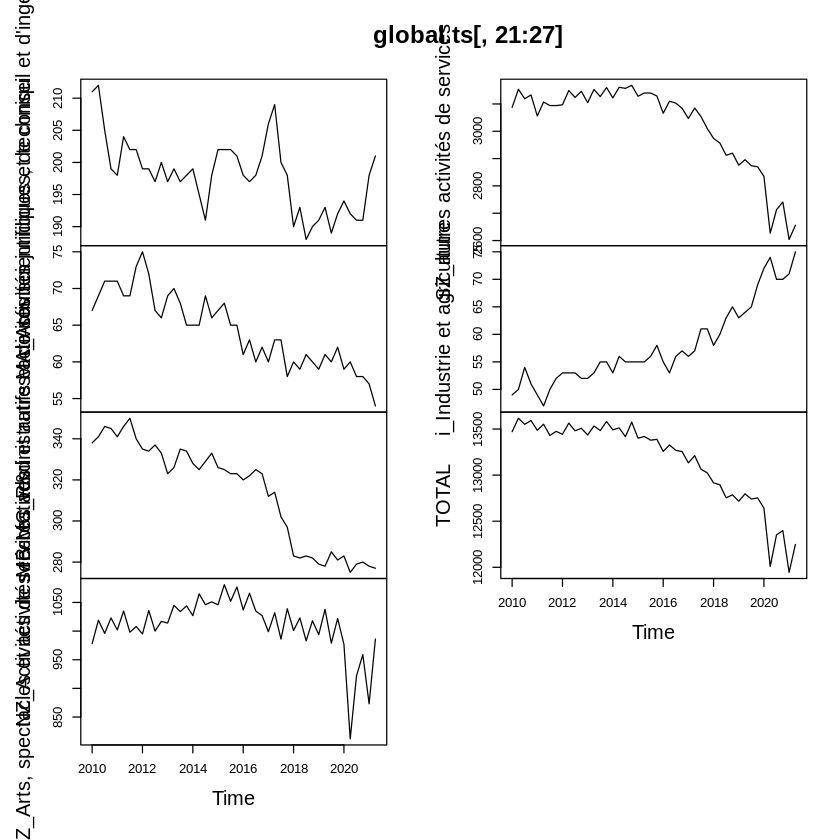

In [44]:
plot.ts(global.ts[,1:10])
plot.ts(global.ts[,11:20])
plot.ts(global.ts[,21:27])


Les series numeros 6, 9, 11 , 18, 21, 26 semblent etre a contre courant de la tendance decroissante des autres secteurs d'activité avec l'arrivée de la crise sanitaire.


 
<hr>

<div id="univariateA">

## II.A Travail sur la serie du nombre total d'établissement

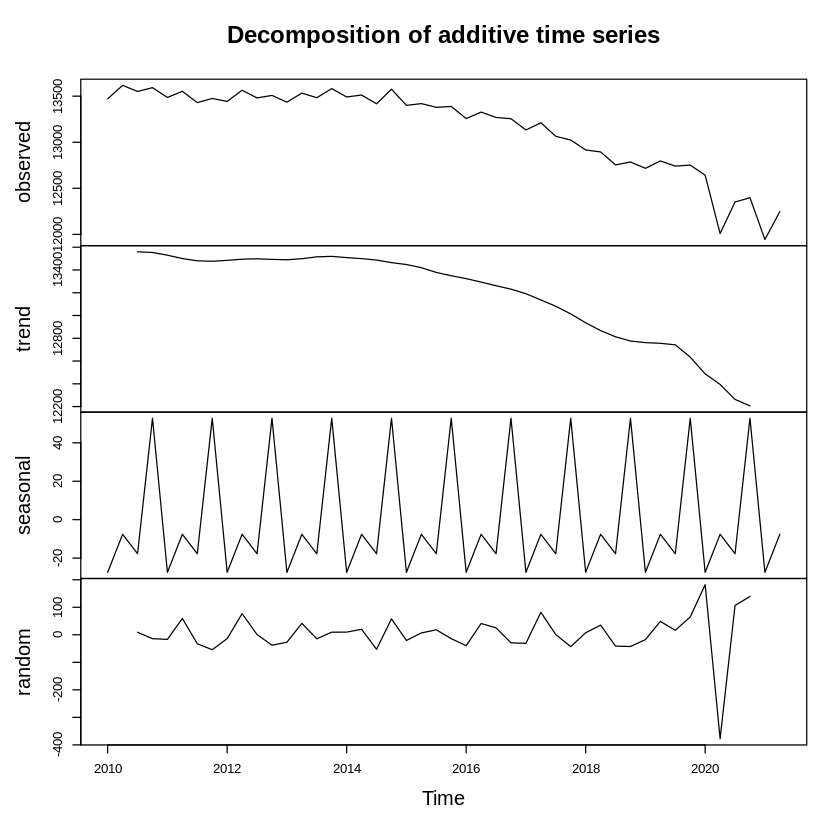

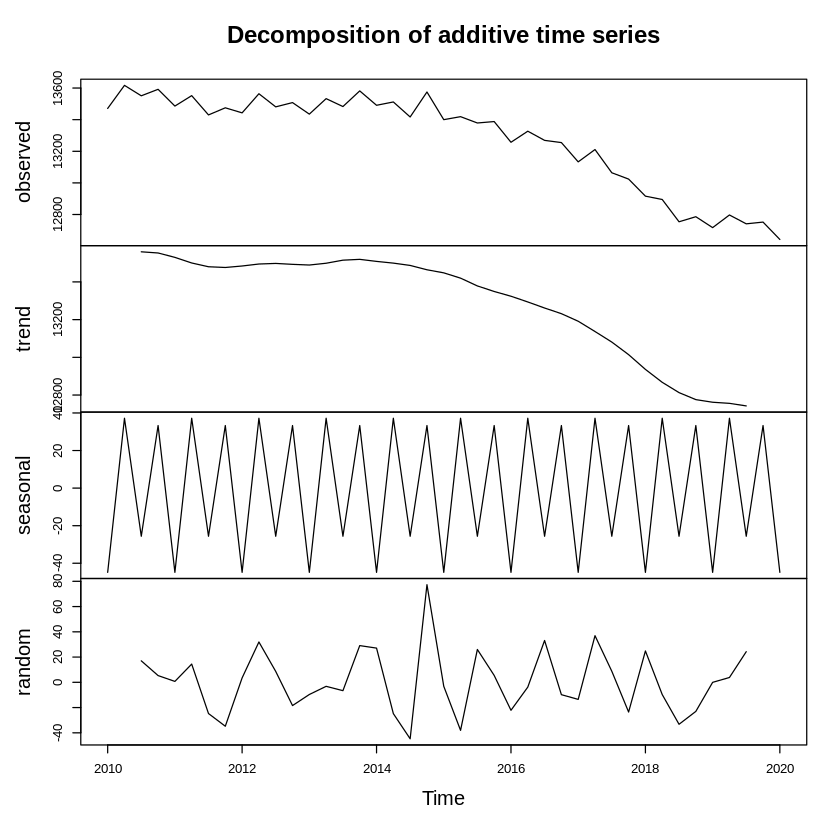

In [45]:
tot_index <-ncol(global.ts)
global.tot.ts <-global.ts[,tot_index]
tot.ts <-df.ts[,tot_index]
par(mar=c(5,4,4,14),xpd=TRUE)
plot(decompose(global.tot.ts))
plot(decompose(tot.ts))


La crise sanitaire interviens comme un elements aléatoire 


*Ici l'on a utilisé une décompostion additive (une décompostiotn multiplicative aurait aussi pu etre utilisée)*

Dans ce type de décomposition classique , on fait l'hypothese que la saisonalité est constante.

Dans notre cas de décomposition additive la méthode se décompose en 4 étapes :

- 1. Soit m la période du composant de saisonnalité. Selon la parité de la période de ce composant on utilise un filtre permettant de désaisonnalisé la série: Utilisation de moyenne artihmétique , ou moyenne rithmétique modifiée.On en deduit alors le composant de trend$\hat{T_t}$

- 2. On en déduit la série détrend : $y_t - \hat{T_t}$

- 3. On peut alors estimer le composant seasonal: $\hat{S_t}$ par régression de  $y_t - \hat{T_t}$

- 4. ON peux alors etudier les résidus estimés : $\hat{Z_t}=y_t - \hat{T_t} - \hat{S_t}$


Essayons d'autre décomposition: En effet la décomposition classique utilisé ici à un  désavantage majeur :

Ce type de méthode fait l'hypothese que le composant saisonal se repète constamment. Pour la pluspart des série cette hypothèse ne pose pas vraiment d eproblème, mais pour des série temporelles plutot longue , cette hypothese deviens risqué. Par example , pour la saisonnalité de la demande d'électricité elle à évolué au cours du temps. **Cette méthode de décompostion classique ne permet pas de prendre en compte des changement de saisonnalité au cours du temps**.

Quels autres décompostion peuvent etre interessantes pour nous ?

- **X11 decompostion** : Allowed the seasonal componnent to vary slowly over time
- **SEATS decomposition**
- **STL decomposition**

In [46]:
require(seasonal)

Loading required package: seasonal



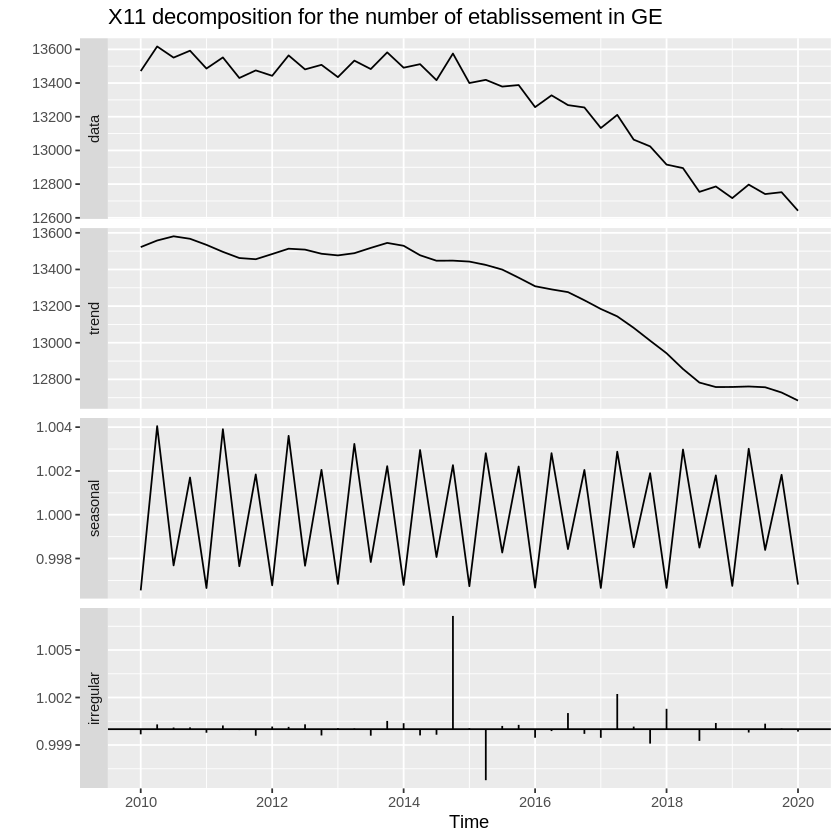

In [47]:
X11.decompose <- seas(tot.ts,x11="")
autoplot(X11.decompose)+
ggtitle("X11 decomposition for the number of etablissement in GE")

En restant dans le contexte d'une décompostion additive. IL est facile de faire des prédiction à partie de la décomposition.
On peux réécrire la TS tel que :
$y_t = \hat{S_t}+ \hat{T_t}+ \hat{R_t}$
Pour faire des prédiction de $y_t$ , on fait des prédictions sur $\hat{S_t}$ ainsi que sur $\hat{A_t}=\hat{T_t}+ \hat{R_t}$ séparamment.

En ce qui concerne les prédictions sur $\hat{S_t}$, elle sont plutot simpliste : Normallement ce composant change très peux au cours du temps . Ainsi on n'a pas beaucoup de travail a faire. Et l'on fait des prédicton naîves


Pour les prédiciton sur $\hat{A_t}$, ce composant n'a pas de saisonnalité. Ainsi l'on peux utiisé des model non saisonnal comme les ARIMA , ARMA , AR,MA . Ou encore des modeles de lissage exponentiel.


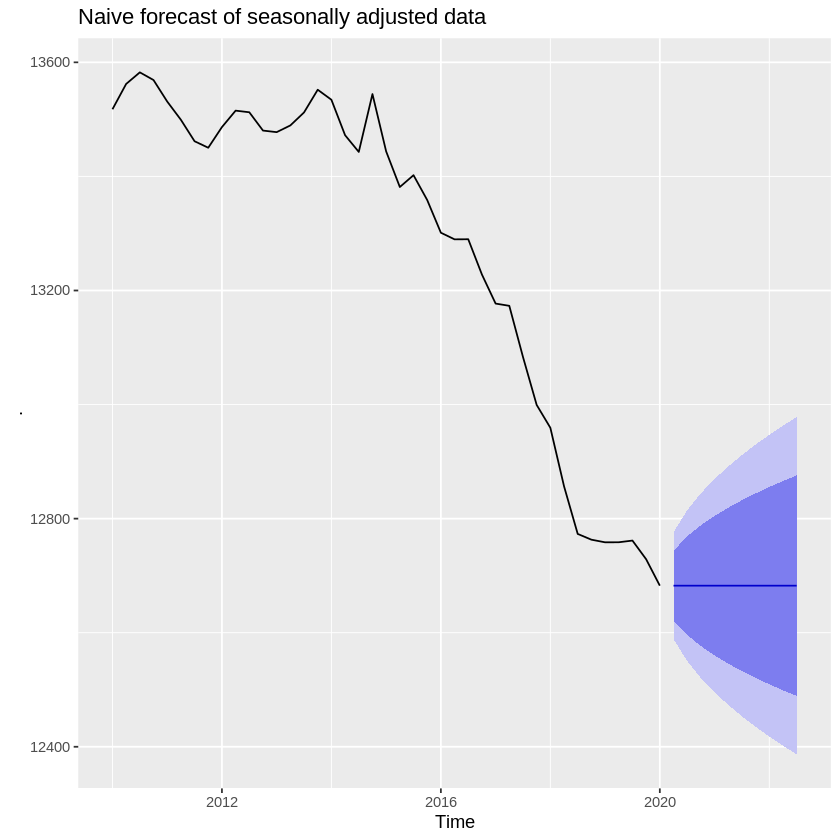

In [48]:
X11.decompose %>% seasadj()%>% naive() %>%autoplot() +ggtitle("Naive forecast of seasonally adjusted data")


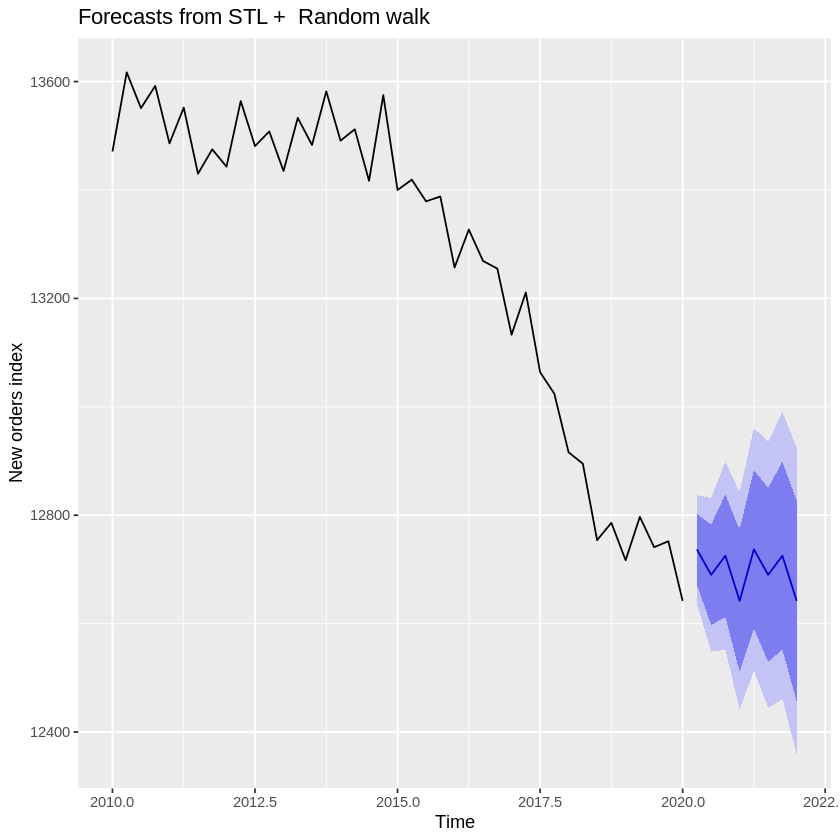

In [49]:
fit <- stl(tot.ts, t.window=13, s.window="periodic",
  robust=TRUE)
fit %>% forecast(method="naive") %>%
  autoplot() + ylab("New orders index")

In [50]:
mod.1 <- fit %>% forecast(method="naive")
mod.1

        Point Forecast    Lo 80    Hi 80    Lo 95    Hi 95
2020 Q2       12737.10 12671.65 12802.55 12637.00 12837.20
2020 Q3       12690.01 12597.45 12782.58 12548.45 12831.58
2020 Q4       12725.38 12612.01 12838.74 12552.00 12898.75
2021 Q1       12642.00 12511.10 12772.90 12441.80 12842.20
2021 Q2       12737.10 12590.74 12883.46 12513.27 12960.93
2021 Q3       12690.01 12529.69 12850.34 12444.82 12935.21
2021 Q4       12725.38 12552.21 12898.55 12460.53 12990.22
2022 Q1       12642.00 12456.87 12827.13 12358.87 12925.13

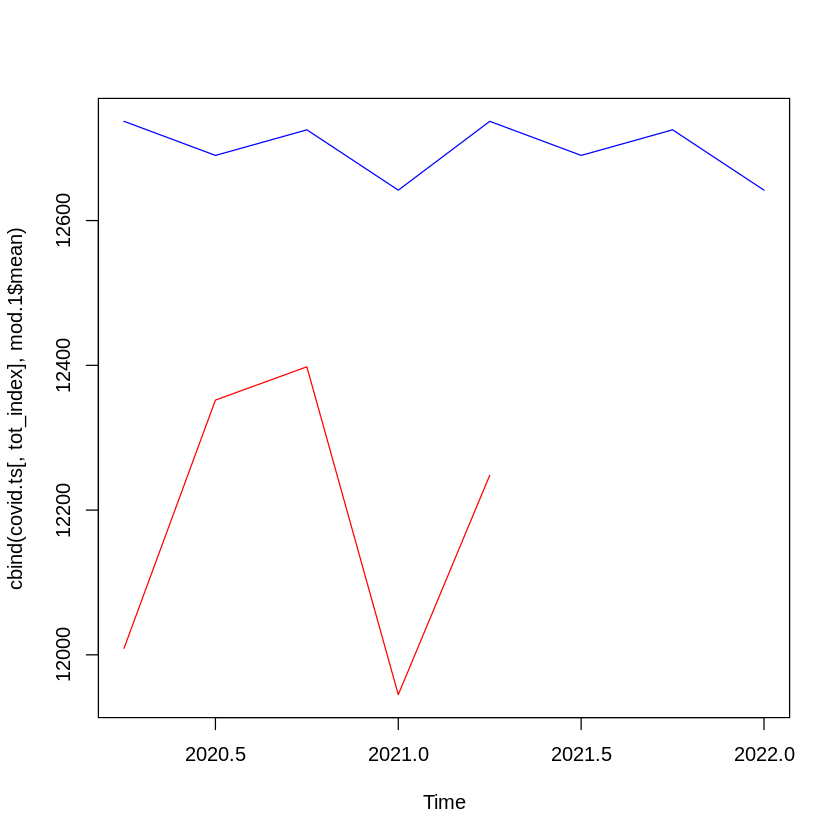

In [51]:
plot.ts(cbind(covid.ts[,tot_index],mod.1$mean),plot.type="single",col=c("red","blue"))

Let see if this model is good on test.ts part

**Now let try to fit a model to the serie**

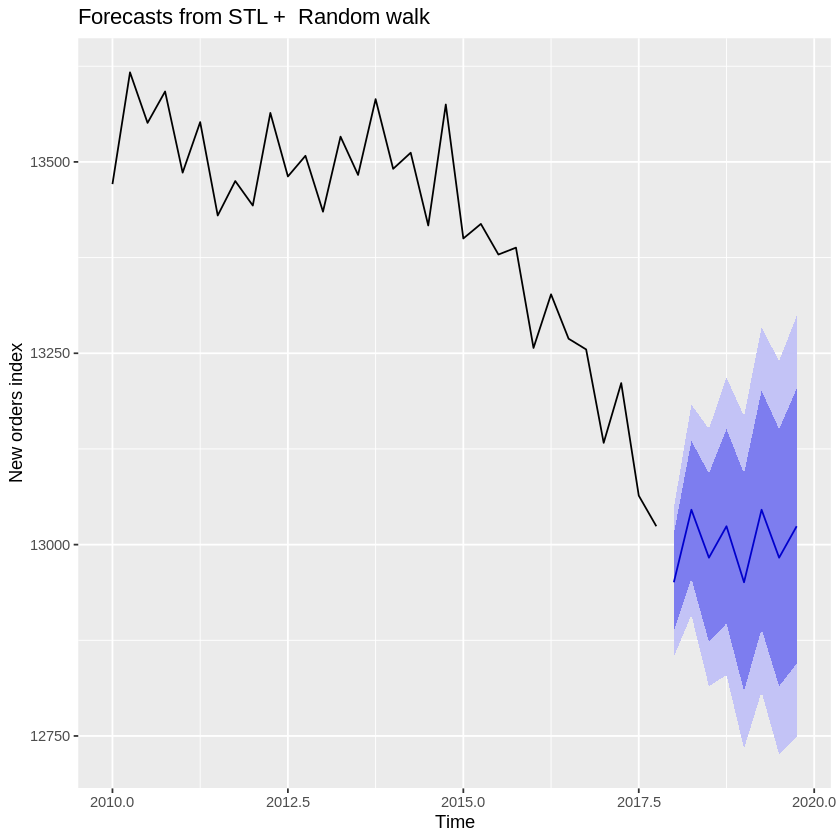

In [52]:
tot.train.ts <- train.ts[,tot_index]


fit <- stl(tot.train.ts, t.window=13, s.window="periodic",
  robust=TRUE)
fit %>% forecast(method="naive") %>%
  autoplot() + ylab("New orders index")

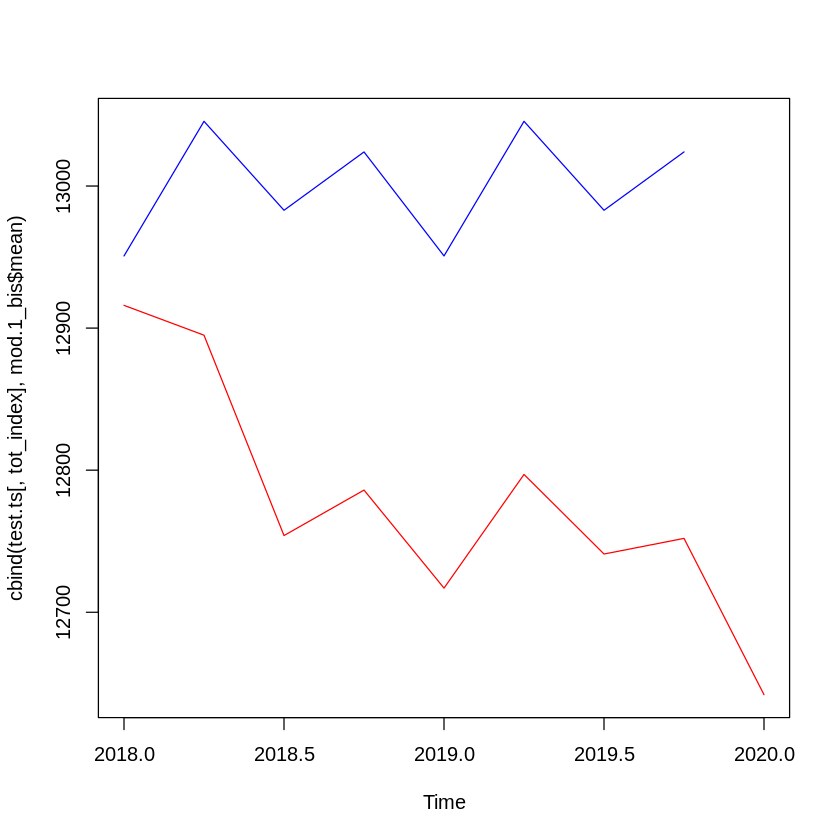

In [53]:
mod.1_bis <- fit %>% forecast(method="naive")
plot.ts(cbind(test.ts[,tot_index],mod.1_bis$mean),plot.type="single",col=c("red","blue"))

Notre modèle tend à revoir les chiffre à leur hausse sur l'échantillon test. Ce n'est pas vraimetn étonnat car la fin de la Time Serie s'arrete au moment ou l'on a une tendance constante ainsi nos prédictions conserve cette tendance naîvement. 

**L'estimation Naive n'est pas trop recommandable dans notre contexte**

<hr>

### Forecast with Holt and Winter exponential smoothing

In [54]:
fit1.hw <- hw(tot.ts,seasonal = "additive")

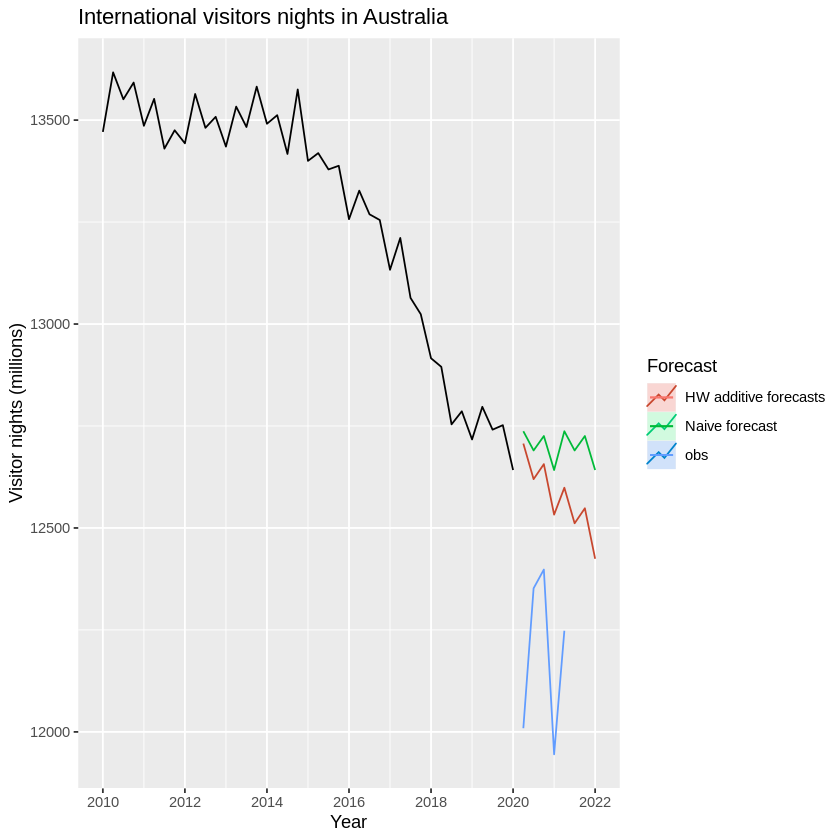

In [57]:
# see differnces between teh 2 ways of predictions

autoplot(tot.ts)+
  autolayer(fit1.hw, series="HW additive forecasts", PI=FALSE) +
  autolayer(mod.1$mean,series="Naive forecast")+
  autolayer(covid.ts[,tot_index],serie="obs")+
  xlab("Year") +
  ylab("Visitor nights (millions)") +
  ggtitle("International visitors nights in Australia") +
  guides(colour=guide_legend(title="Forecast"))


 <hr>

 ### Methode de Box Jenkins

  - 1. Identification du modèle
  - 2. Estimation des paramètres du modèle
  - 3. Validation du modèle


  Essayons de trouver un bon modèle cette fois ci au lieu de compter sur la décomposition en fesant des prédictions naîves.

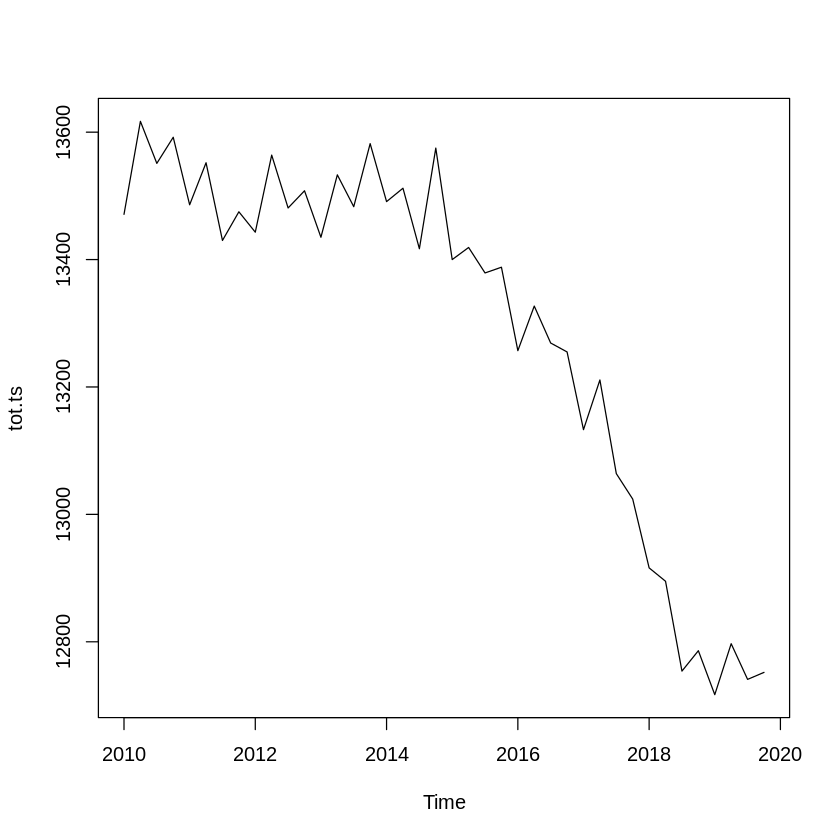

In [42]:
plot.ts(tot.ts)

Dans un premier temps , l'on peux voir que notre série est loin d'être stationnaire. 

De plus lors de nos précédentes décomposition , l'on a pu voir que la série possède une saisonnalité, ainsi qu'une trend  qui semble linéaire.

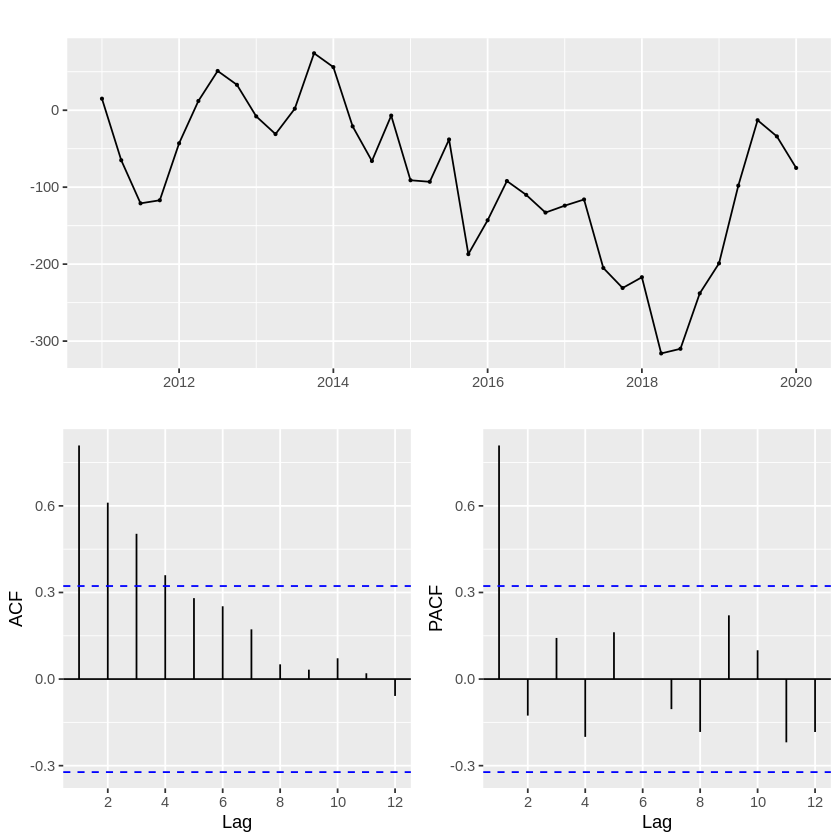

In [58]:
tot.ts%>% diff(lag=4)%>% ggtsdisplay()

Le processus n'étant toujours pas stationnaire, ajoutons une differenciation d'ordre 1.

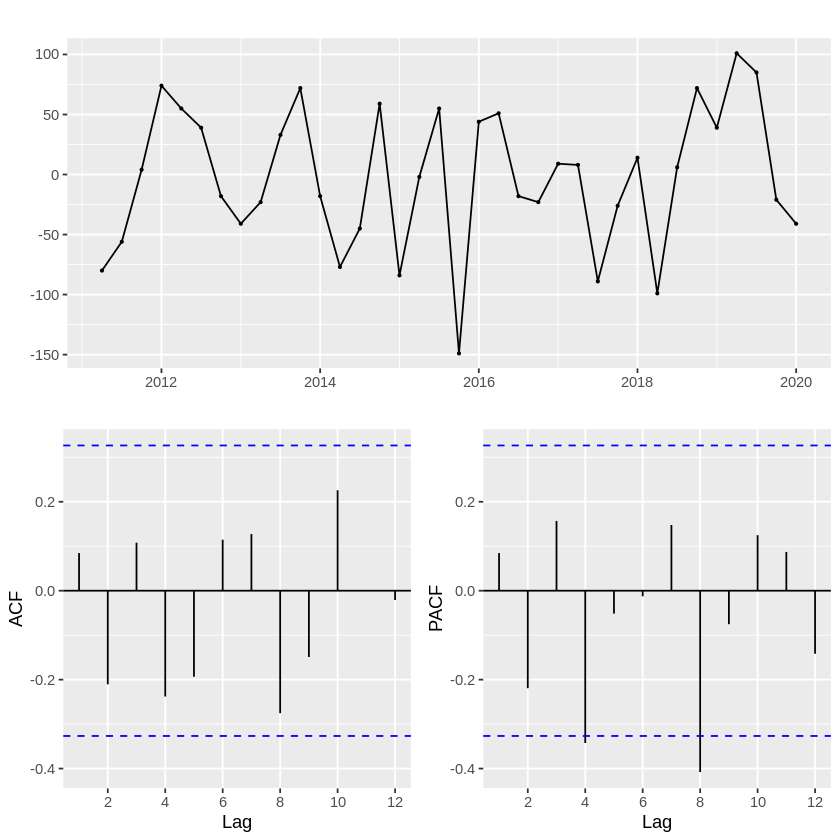

In [59]:
tot.ts%>% diff(lag=4)%>% diff()%>% ggtsdisplay()

 Apparait stationnaire désormais

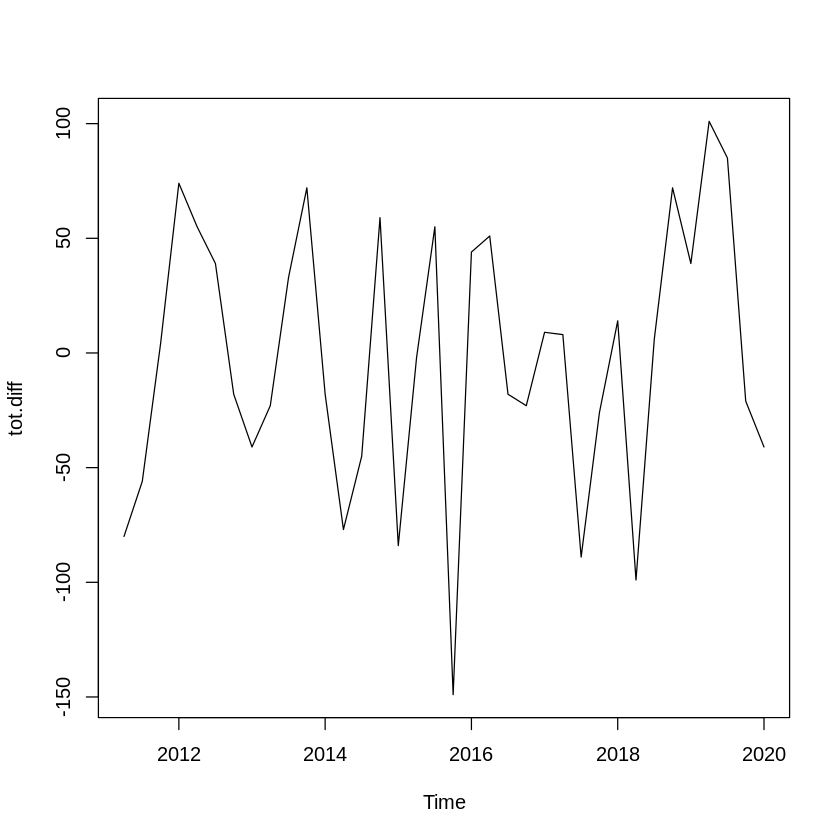

In [60]:
tot.diff <-diff(tot.ts,lag=4)
tot.diff <- diff(tot.diff)
plot.ts(tot.diff)

Les tests de stationarités utilisé :

- **DF test** : Pour les differents modèles possibles *(none,trend et drift)*.Donne acces à plusieurs type de p. value. Selon le modèle en vigueur. On peux avoir la pvalue concernant l'hypothese de racine unitaire, mais aussi d'une trend constante ainsi que celle d'une trend linéaire.
    Pour ces test le mieux est de regarder les Valeur de chaque test et de les comparé aux valeur critique. Dans le cas de l'hypothese de racine unitaire.*Prenons l'exemple d'un modele trend : On observe les valeurs de test suivants: -1.851 2.5975 3.2606  ainsi que les valeurs critiques suivantes:      1pct  5pct 10pct
tau3 -4.15 -3.50 -3.18
phi2  7.02  5.13  4.31
phi3  9.31  6.73  5.61
**La 1 ere valeur de test fait reference au test de racine unitaire. Cette  derniere etant supérieure a toute les critical value de la ligne tau3 on ne peux donc pas rejeter Ho: On conserve l'hypothèse de racine unitaire et donc de non stationnarité.***

 L'interet de ce test est aussi de regardez d'autre hypotheses : La présence d'une trend lineaire ou d'une constante. De plus l'on peux regarder la significativité des coefficient des differents modèles pour voir à partir de combien de lag les variables ne sont plus significative. Celle donne aussi un apercu des autocorellations présentent dans la série.
 
- **KPSS** : Le test de KPSS est un test plus robuste que celui de DF. Il returne une fois de plus la valuer du test ainsique les valeurs critique. **Si notre stat de test est supérieur aux valeurs critique l'on rejette l'hypothèse de stationnarité**

- **PP test** :le test de Phillips-Perron est tres similaire au test KPSS . IL retourne seulement la pvaleur. 
**Si pval <= alpha : On rejette Ho *(Ho:la serie est non stationnaire)*: La série est stationnaire    <br> Si pval>alpha  : On ne peux rejetter Ho: la série est stationnaire**


In [63]:
suppressPackageStartupMessages(require("vars"))

In [64]:
test_for_stationarity <- function(ts,lags.DF){
    test.DF.none <-ur.df(y=ts,lags=lags.DF,type = "none")
    test.DF.drift <-ur.df(y=ts,lags=lags.DF,type = "drift")
    test.DF.trend <- ur.df(y=ts,lags=lags.DF)   
    print(summary(test.DF.none))
    print(attr(test.DF.none,"testreg"))
    print(summary(test.DF.drift))
    print(attr(test.DF.drift,"testreg"))
    print(summary(test.DF.trend))
    print(attr(test.DF.trend,"testreg"))
    print("----------------KPSS test-----------------")
    KPSS_test <-ur.kpss(ts,type="tau")
    print(    summary(KPSS_test))
    print("----------------PP test-----------------")
    print(PP.test(ts))
    
}

In [65]:
test_for_stationarity(tot.ts,lags=4)


############################################### 
# Augmented Dickey-Fuller Test Unit Root Test # 
############################################### 

Test regression none 


Call:
lm(formula = z.diff ~ z.lag.1 - 1 + z.diff.lag)

Residuals:
   Min     1Q Median     3Q    Max 
-69.40 -41.29 -15.68  35.26  97.60 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)   
z.lag.1     -0.0012354  0.0008862  -1.394  0.17322   
z.diff.lag1 -0.2404418  0.1555407  -1.546  0.13229   
z.diff.lag2  0.1370466  0.1618671   0.847  0.40367   
z.diff.lag3 -0.0301252  0.1600861  -0.188  0.85196   
z.diff.lag4  0.4900748  0.1486282   3.297  0.00245 **
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 52.71 on 31 degrees of freedom
Multiple R-squared:  0.6884,	Adjusted R-squared:  0.6382 
F-statistic:  13.7 on 5 and 31 DF,  p-value: 4.334e-07


Value of test-statistic is: -1.394 

Critical values for test statistics: 
      1pct  5pct 10pct
tau1 -2.62 -1

**CCL :** Cette batterie de tests nous amene ac onsidere objectivement la serie initiale `tot.ts`comme non stationnaire.

In [66]:
test_for_stationarity(tot.diff,lags.DF = 4)


############################################### 
# Augmented Dickey-Fuller Test Unit Root Test # 
############################################### 

Test regression none 


Call:
lm(formula = z.diff ~ z.lag.1 - 1 + z.diff.lag)

Residuals:
     Min       1Q   Median       3Q      Max 
-122.319  -28.381   -5.293   32.433   82.769 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)   
z.lag.1      -1.3583     0.4421  -3.072  0.00494 **
z.diff.lag1   0.4696     0.3788   1.240  0.22617   
z.diff.lag2   0.2117     0.3497   0.605  0.55019   
z.diff.lag3   0.4326     0.2610   1.658  0.10940   
z.diff.lag4   0.1035     0.1986   0.521  0.60667   
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 56.72 on 26 degrees of freedom
Multiple R-squared:  0.5969,	Adjusted R-squared:  0.5194 
F-statistic:   7.7 on 5 and 26 DF,  p-value: 0.0001486


Value of test-statistic is: -3.0722 

Critical values for test statistics: 
      1pct  5pct 10pct
tau1

**CCL :** Cette batterie de tests nous amene ac onsidere objectivement la serie initiale `tot.diff` comme stationnaire pour $\alpha = 5%$.

## Identification des parametres du modèle SARIMA

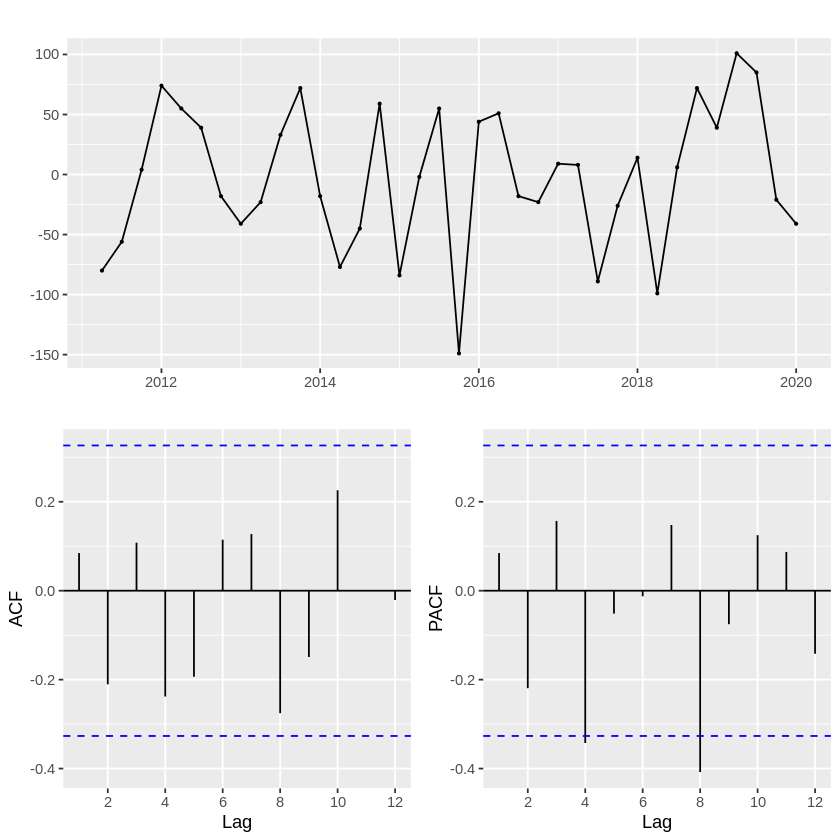

In [67]:
tot.ts%>% diff(lag=4)%>% diff()%>% ggtsdisplay()

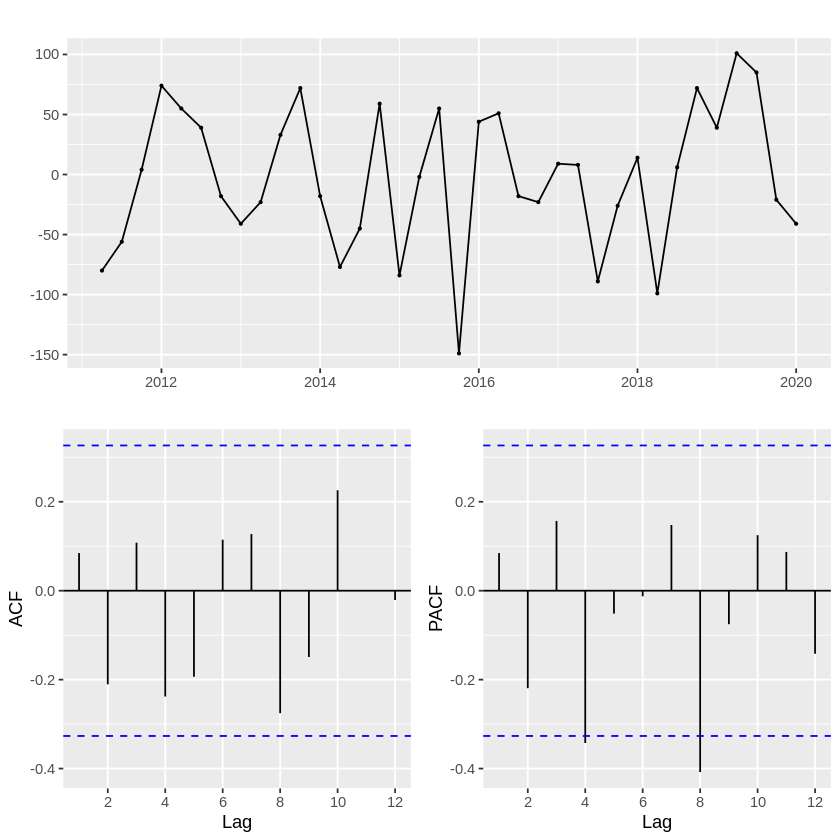

In [68]:
tot.diff %>% ggtsdisplay()

On peux voir que dans le plot de la TS diff on a :

 - Dans le graphe de l'ACF : il n'y a pas de pic significatif &rarr; non seasonal MA(0) and seasonal MA(1) cause there is repet between lag =1 et lag=3
 - Dans le graph de la PACF , on a un pics significatif  puvant suggerer un AR(1) non saisonal ainsi que un AR(1) saisonal

 => Essayons donc un SARIMA(1,1,0)(1,1,1)4

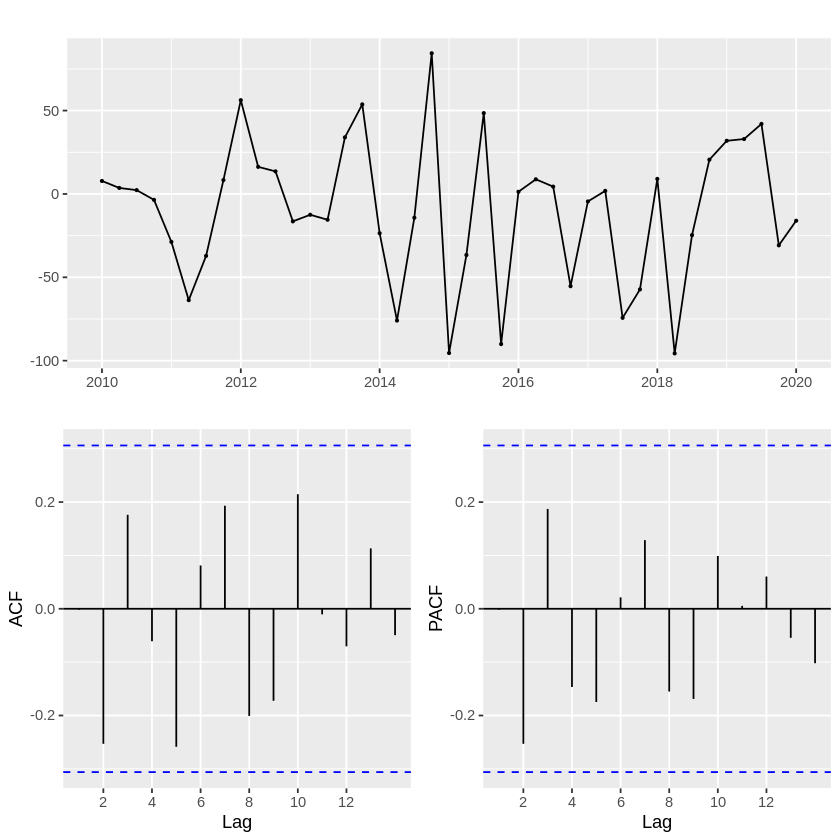

In [69]:
fit1 <- arima(tot.ts, order=c(1,1,0),seasonal = c(1,1,1))
fit1 %>% residuals()%>% ggtsdisplay()

Les résidus semblent montrer que le modèle fit bien nos données.
L'observation des ACF et PACF etant assez subjective construisons une grilles de parmatre pour etendre le nombre de modèle que l'on peux considerer

In [70]:
AR_season <-0:2
MA_season <-0:2
AR <- 0:2
MA <-0:2
L <- list()
for (p in AR){
    for(q in MA){
        for(P in AR_season){
            for (Q in MA_season){
                print(paste("SARIMA(",p,",1,",q,")x(",P,",1,",Q,")",sep=""))
                L[[paste(
                    "SARIMA(",p,",1,",q,")x(",P,",1,",Q,")",sep="")]] <- arima(tot.ts,order=c(p,1,q),seasonal=c(P,1,Q))
            }
        }

        
    }
}


[1] "SARIMA(0,1,0)x(0,1,0)"
[1] "SARIMA(0,1,0)x(0,1,1)"
[1] "SARIMA(0,1,0)x(0,1,2)"
[1] "SARIMA(0,1,0)x(1,1,0)"
[1] "SARIMA(0,1,0)x(1,1,1)"
[1] "SARIMA(0,1,0)x(1,1,2)"
[1] "SARIMA(0,1,0)x(2,1,0)"
[1] "SARIMA(0,1,0)x(2,1,1)"
[1] "SARIMA(0,1,0)x(2,1,2)"
[1] "SARIMA(0,1,1)x(0,1,0)"
[1] "SARIMA(0,1,1)x(0,1,1)"
[1] "SARIMA(0,1,1)x(0,1,2)"
[1] "SARIMA(0,1,1)x(1,1,0)"
[1] "SARIMA(0,1,1)x(1,1,1)"
[1] "SARIMA(0,1,1)x(1,1,2)"
[1] "SARIMA(0,1,1)x(2,1,0)"
[1] "SARIMA(0,1,1)x(2,1,1)"
[1] "SARIMA(0,1,1)x(2,1,2)"
[1] "SARIMA(0,1,2)x(0,1,0)"
[1] "SARIMA(0,1,2)x(0,1,1)"
[1] "SARIMA(0,1,2)x(0,1,2)"
[1] "SARIMA(0,1,2)x(1,1,0)"
[1] "SARIMA(0,1,2)x(1,1,1)"
[1] "SARIMA(0,1,2)x(1,1,2)"
[1] "SARIMA(0,1,2)x(2,1,0)"
[1] "SARIMA(0,1,2)x(2,1,1)"
[1] "SARIMA(0,1,2)x(2,1,2)"
[1] "SARIMA(1,1,0)x(0,1,0)"
[1] "SARIMA(1,1,0)x(0,1,1)"
[1] "SARIMA(1,1,0)x(0,1,2)"
[1] "SARIMA(1,1,0)x(1,1,0)"
[1] "SARIMA(1,1,0)x(1,1,1)"
[1] "SARIMA(1,1,0)x(1,1,2)"
[1] "SARIMA(1,1,0)x(2,1,0)"
[1] "SARIMA(1,1,0)x(2,1,1)"
[1] "SARIMA(1,1,0)x(

Warning message in log(s2):
“NaNs produced”
Warning message in log(s2):
“NaNs produced”
Warning message in log(s2):
“NaNs produced”
Warning message in log(s2):
“NaNs produced”
Warning message in log(s2):
“NaNs produced”
Warning message in log(s2):
“NaNs produced”
Warning message in log(s2):
“NaNs produced”


[1] "SARIMA(1,1,2)x(0,1,0)"
[1] "SARIMA(1,1,2)x(0,1,1)"
[1] "SARIMA(1,1,2)x(0,1,2)"
[1] "SARIMA(1,1,2)x(1,1,0)"
[1] "SARIMA(1,1,2)x(1,1,1)"
[1] "SARIMA(1,1,2)x(1,1,2)"
[1] "SARIMA(1,1,2)x(2,1,0)"
[1] "SARIMA(1,1,2)x(2,1,1)"
[1] "SARIMA(1,1,2)x(2,1,2)"
[1] "SARIMA(2,1,0)x(0,1,0)"
[1] "SARIMA(2,1,0)x(0,1,1)"
[1] "SARIMA(2,1,0)x(0,1,2)"
[1] "SARIMA(2,1,0)x(1,1,0)"
[1] "SARIMA(2,1,0)x(1,1,1)"
[1] "SARIMA(2,1,0)x(1,1,2)"
[1] "SARIMA(2,1,0)x(2,1,0)"
[1] "SARIMA(2,1,0)x(2,1,1)"
[1] "SARIMA(2,1,0)x(2,1,2)"
[1] "SARIMA(2,1,1)x(0,1,0)"
[1] "SARIMA(2,1,1)x(0,1,1)"
[1] "SARIMA(2,1,1)x(0,1,2)"
[1] "SARIMA(2,1,1)x(1,1,0)"
[1] "SARIMA(2,1,1)x(1,1,1)"
[1] "SARIMA(2,1,1)x(1,1,2)"
[1] "SARIMA(2,1,1)x(2,1,0)"
[1] "SARIMA(2,1,1)x(2,1,1)"
[1] "SARIMA(2,1,1)x(2,1,2)"
[1] "SARIMA(2,1,2)x(0,1,0)"
[1] "SARIMA(2,1,2)x(0,1,1)"
[1] "SARIMA(2,1,2)x(0,1,2)"


Warning message in log(s2):
“NaNs produced”
Warning message in log(s2):
“NaNs produced”


[1] "SARIMA(2,1,2)x(1,1,0)"
[1] "SARIMA(2,1,2)x(1,1,1)"
[1] "SARIMA(2,1,2)x(1,1,2)"
[1] "SARIMA(2,1,2)x(2,1,0)"
[1] "SARIMA(2,1,2)x(2,1,1)"
[1] "SARIMA(2,1,2)x(2,1,2)"


In [71]:
#--------------------------
# Selection models based on residuals forms 
alpha <- 0.1
test.bb <- unlist(lapply(L,function(i){Box.test(i$res)$p.value}))
L.select <- L[which(test.bb >=alpha)]


In [72]:
#-----------------------
# They all are selected

(L.select %>% length) / (L%>%length)

[1] 1

In [73]:
aic.select <- unlist(lapply(L.select,function(i){i$aic}))

Gardons les 3 meilleurs modèles selon l'AIC :

In [74]:
selected.models <-sort(aic.select,decreasing = F)[1:3] 
L <-L[names(selected.models)]

In [75]:
mod.SARIMA.1 <-L[[1]]
mod.SARIMA.2 <-L[[2]]
mod.SARIMA.3 <-L[[3]]
prev.SARIMA.1 <-predict(mod.SARIMA.1,n.ahead=6)$pred
prev.SARIMA.2 <-predict(mod.SARIMA.2,n.ahead=6)$pred
prev.SARIMA.3 <-predict(mod.SARIMA.3,n.ahead=6)$pred


	Ljung-Box test

data:  Residuals from ARIMA(0,1,0)(0,1,2)[4]
Q* = 7.7257, df = 6, p-value = 0.2589

Model df: 2.   Total lags used: 8



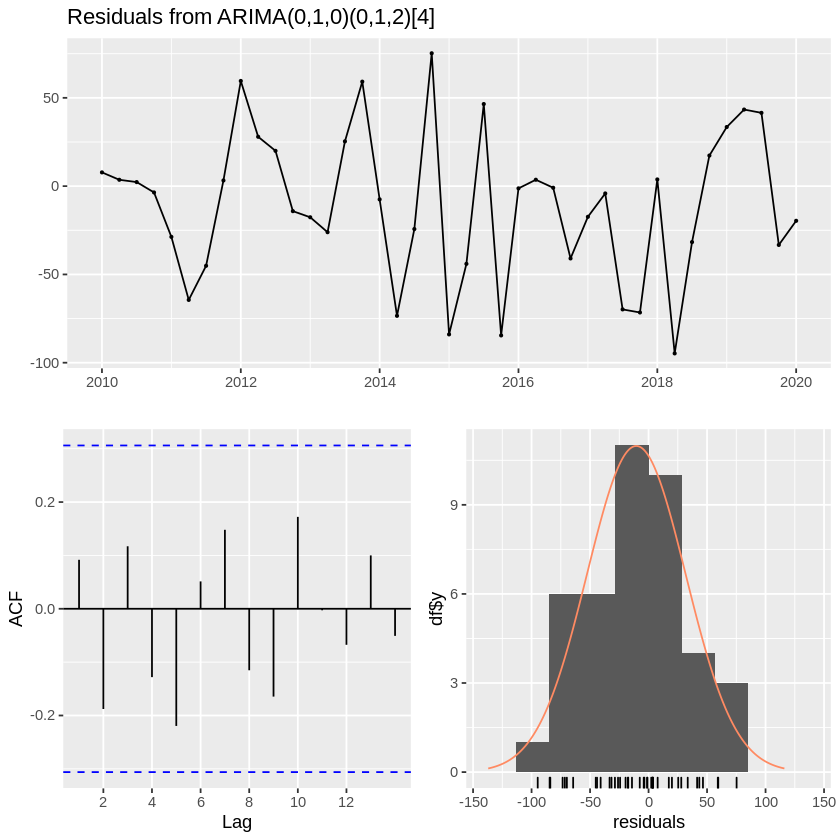


	Ljung-Box test

data:  Residuals from ARIMA(2,1,2)(0,1,1)[4]
Q* = 1.9593, df = 3, p-value = 0.5809

Model df: 5.   Total lags used: 8



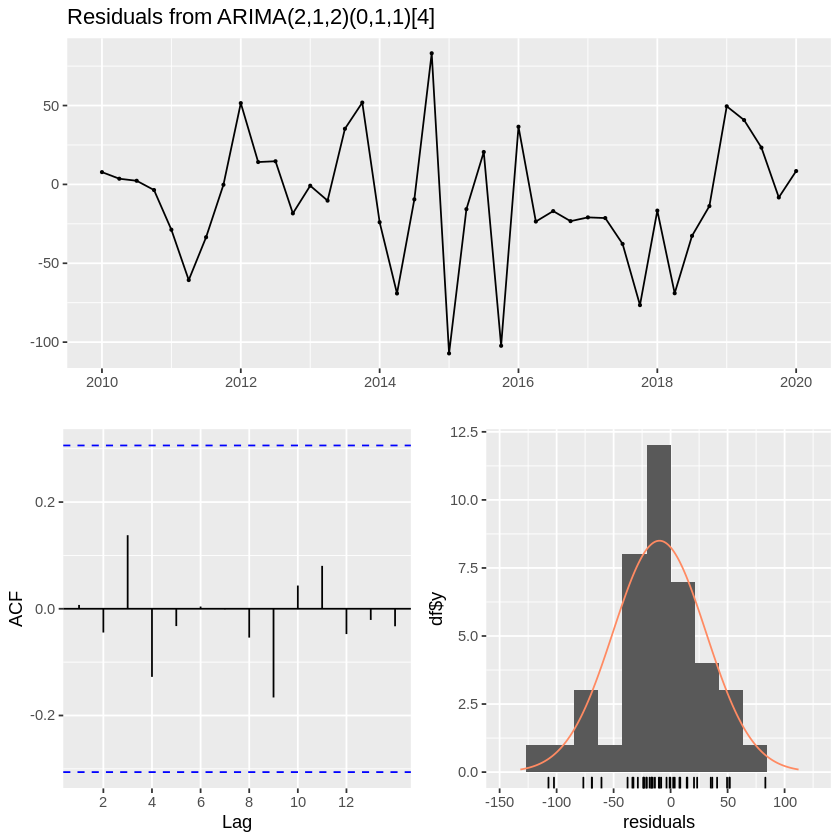


	Ljung-Box test

data:  Residuals from ARIMA(0,1,0)(1,1,1)[4]
Q* = 10.599, df = 6, p-value = 0.1016

Model df: 2.   Total lags used: 8



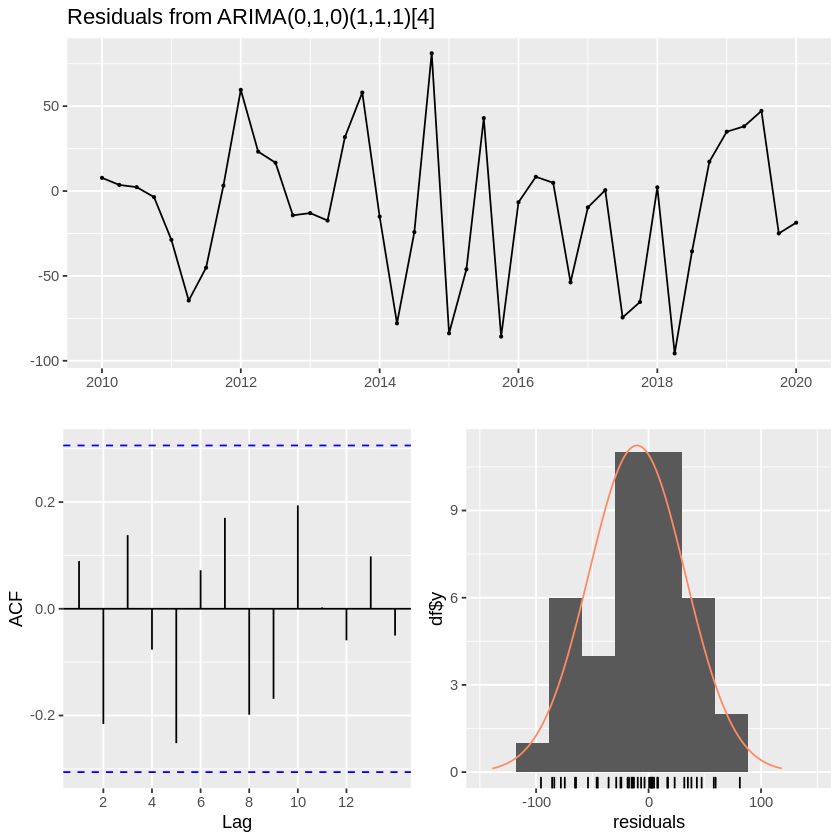

In [76]:
checkresiduals(mod.SARIMA.1)
checkresiduals(mod.SARIMA.2)
checkresiduals(mod.SARIMA.3)

In [82]:
prev.SARIMA.1.bis<-c(df.ts[nrow(df.ts),tot_index],prev.SARIMA.1) %>%ts(start=c(2020,1),frequency=4)
prev.SARIMA.2.bis<-c(df.ts[nrow(df.ts),tot_index],prev.SARIMA.2) %>%ts(start=c(2020,1),frequency=4)
prev.SARIMA.3.bis<-c(df.ts[nrow(df.ts),tot_index],prev.SARIMA.3) %>%ts(start=c(2020,1),frequency=4)

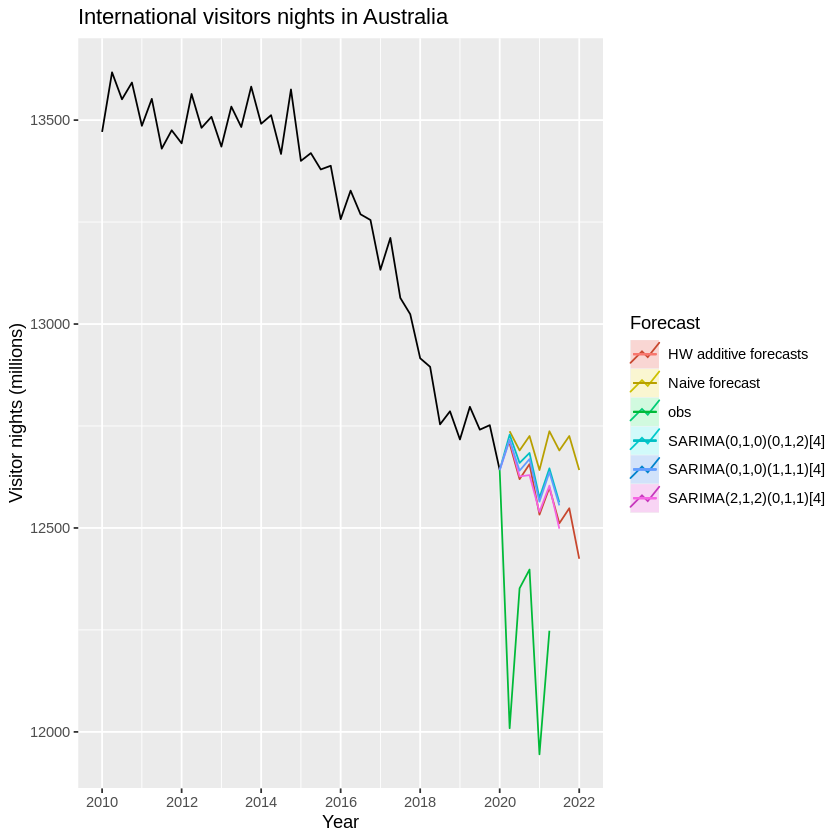

In [86]:
autoplot(tot.ts)+
  autolayer(fit1.hw, series="HW additive forecasts", PI=FALSE) +
  autolayer(mod.1$mean,series="Naive forecast")+
  autolayer(ts(c(df.ts[nrow(df.ts),tot_index],covid.ts[,tot_index]),start=c(2020,1),frequency=4),series="obs")+
  autolayer(prev.SARIMA.1.bis,series="SARIMA(0,1,0)(0,1,2)[4]")+
  autolayer(prev.SARIMA.2.bis,series="SARIMA(2,1,2)(0,1,1)[4]")+
  autolayer(prev.SARIMA.3.bis,series="SARIMA(0,1,0)(1,1,1)[4]")+
  xlab("Year") +
  ylab("Visitor nights (millions)") +
  ggtitle("International visitors nights in Australia") +
  guides(colour=guide_legend(title="Forecast"))

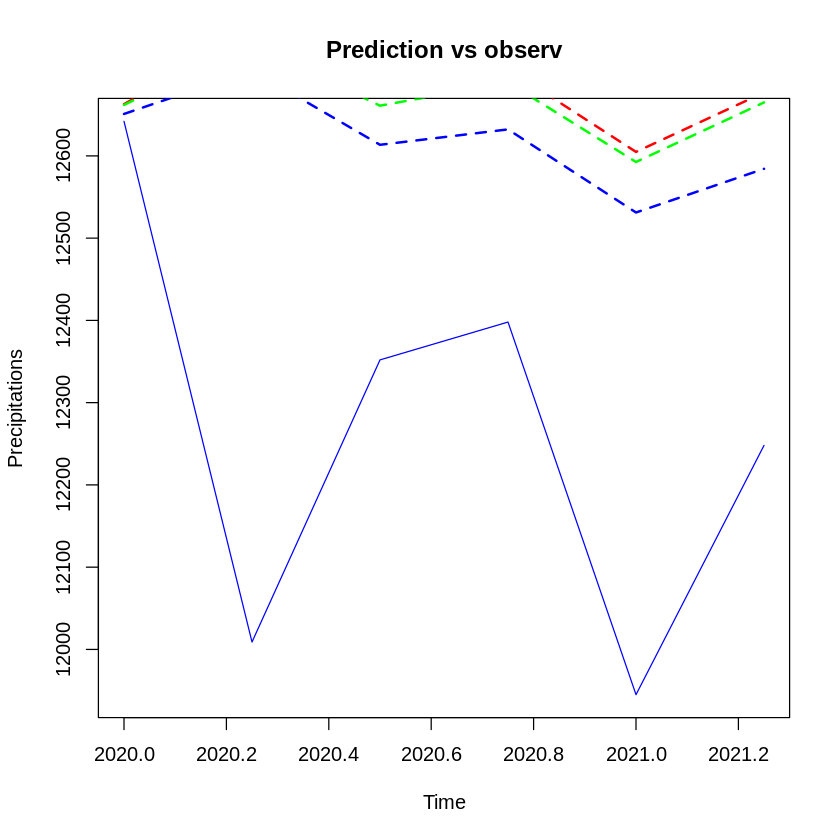

In [143]:
#------------------------------------------
# Plot with only SARIMA models 

plot.ts(covid.ts[,tot_index],
    col="blue",
    main="Prediction vs observ",
    xlab="Time",
    ylab="Precipitations"
)
lines(prev.SARIMA.1,col="red",lty=2,lwd=2)
lines(prev.SARIMA.2,col="green",lty=2,lwd=2)
lines(prev.SARIMA.3,col="blue",lty=2,lwd=2)

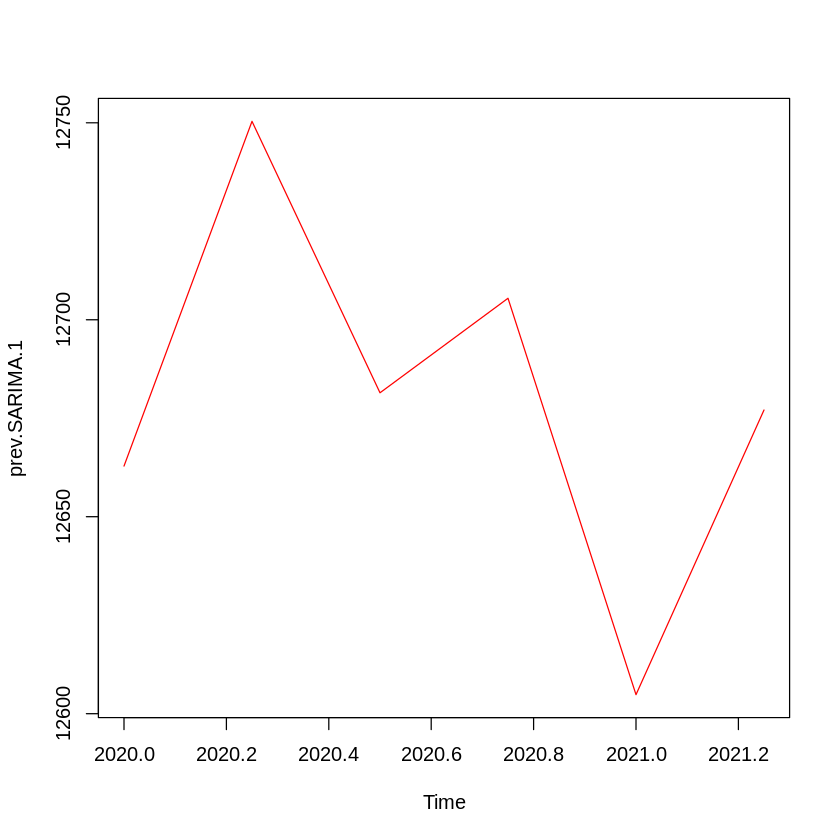

In [144]:
plot(prev.SARIMA.1,col="red")

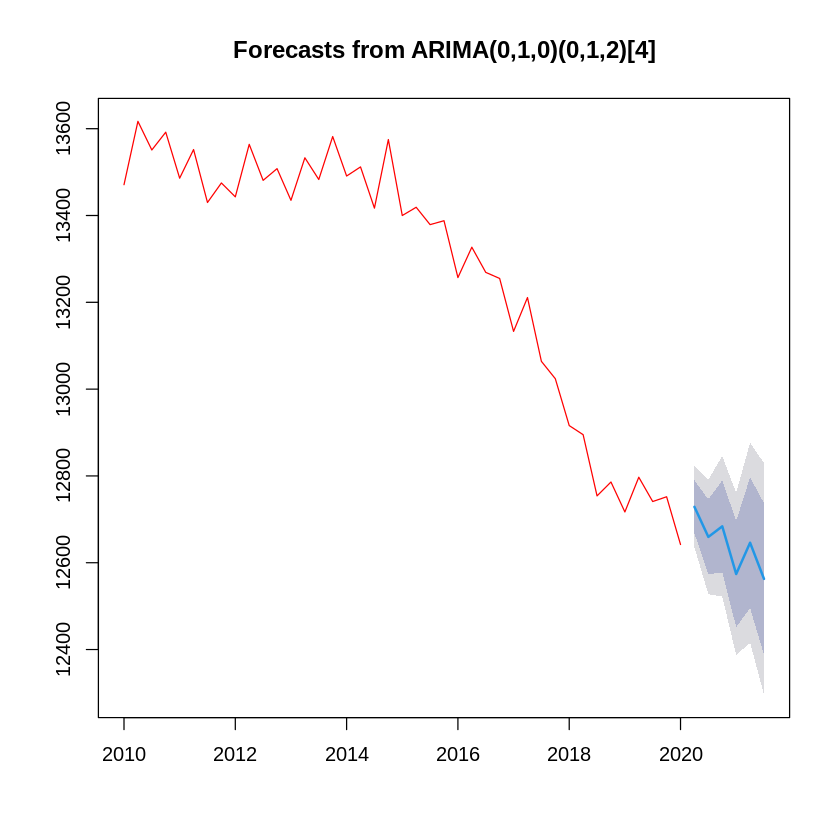

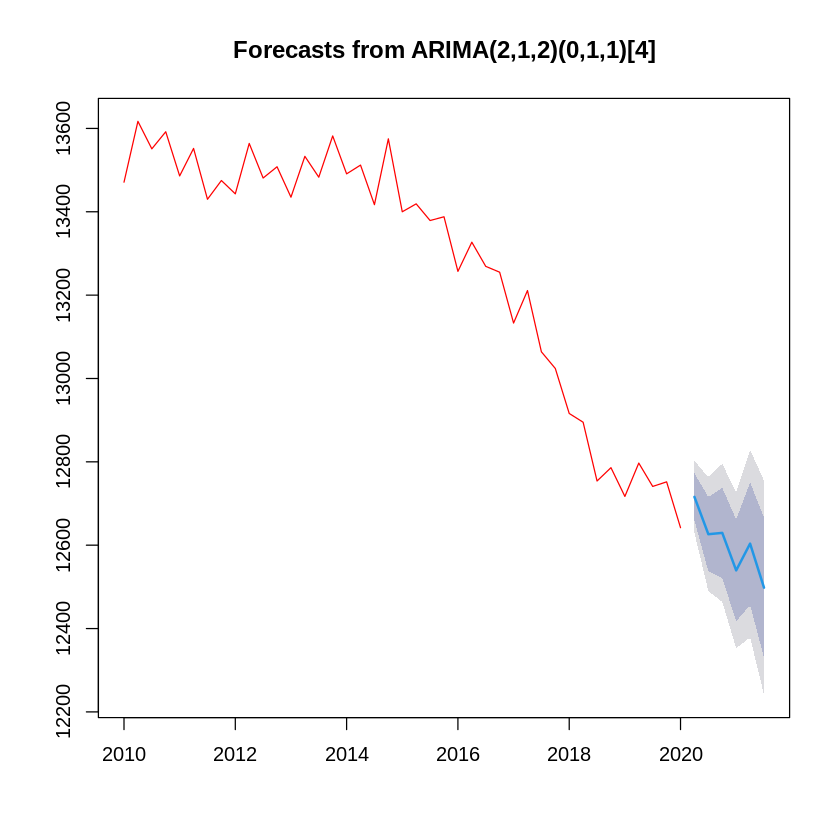

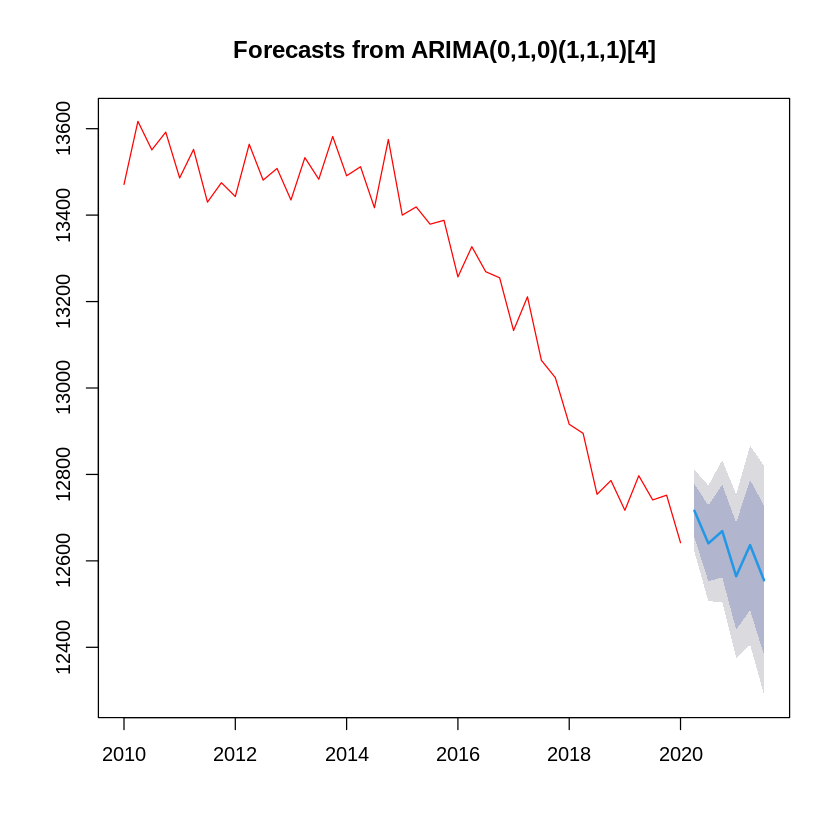

In [87]:
pred.forecast.SARIMA.1 <-mod.SARIMA.1 %>%   forecast(h=6)%>%plot(col="red")
pred.forecast.SARIMA.2 <-mod.SARIMA.2 %>%   forecast(h=6)%>%plot(col="red")
pred.forecast.SARIMA.3 <-mod.SARIMA.3 %>%   forecast(h=6)%>%plot(col="red")



In [89]:
pred.forecast.SARIMA.1

$mean
         Qtr1     Qtr2     Qtr3     Qtr4
2020          12728.79 12659.46 12683.89
2021 12573.98 12646.11 12562.76         

$lower
             80%      95%
2020 Q2 12667.67 12635.32
2020 Q3 12573.03 12527.28
2020 Q4 12578.03 12521.99
2021 Q1 12451.75 12387.04
2021 Q2 12495.51 12415.79
2021 Q3 12388.35 12296.02

$upper
             80%      95%
2020 Q2 12789.90 12822.26
2020 Q3 12745.89 12791.65
2020 Q4 12789.75 12845.78
2021 Q1 12696.22 12760.92
2021 Q2 12796.72 12876.44
2021 Q3 12737.18 12829.51

In [94]:
mod.SARIMA.1 %>% attributes

$names
 [1] "coef"      "sigma2"    "var.coef"  "mask"      "loglik"    "aic"      
 [7] "arma"      "residuals" "call"      "series"    "code"      "n.cond"   
[13] "nobs"      "model"    

$class
[1] "Arima"

In [98]:
evaluate_models <-data.frame("logLikelihood"=c(
    mod.SARIMA.1$loglik,
    mod.SARIMA.2$loglik,
    mod.SARIMA.3$loglik
    ),
    "AIC"=c(
        mod.SARIMA.1$aic,
        mod.SARIMA.2$aic,
        mod.SARIMA.3$aic
    )
)
rownames(evaluate_models) <-c(
    "SARIMA(0,1,0)(0,1,2)[4]",
    "SARIMA(2,1,2)(0,1,1)[4]",
    "SARIMA(0,1,0)(1,1,1)[4]"
)
evaluate_models

,logLikelihood,AIC
,<dbl>,<dbl>
"SARIMA(0,1,0)(0,1,2)[4]",-192.3388,390.6775
"SARIMA(2,1,2)(0,1,1)[4]",-189.6079,391.2158
"SARIMA(0,1,0)(1,1,1)[4]",-192.6344,391.2687


## Make all these predictions for every univariate series

In [230]:
evaluate_models_every_var <- rep(NA,10)

In [231]:
for(i in 1:26 ){
  

  if(!(i %in% c(1,7,9,13))){
    global.var.ts <-global.ts[,i]
    var.ts <- df.ts[,i]
    #-----------------
    # Naive model
    fit <- stl(var.ts, t.window=13, s.window="periodic",
    robust=TRUE)
    mod.naive <- fit %>% forecast(method="naive")
    #-----------------
    # H-W model
    mod.hw <- hw(var.ts,seasonal = "additive")
    #-----------------
    # ARIMA / SARIMA
    mod.ARIMA <-auto.arima(var.ts)
    alpha <- 0.1
    p.val <-Box.test(mod.ARIMA$res)$p.value
    if(p.val <  alpha){
      print("HYPOTHESIS RESIDUALS NOT ACCEPTED")
    }
    prev.SARIMA <-predict(mod.ARIMA,n.ahead=5)$pred
    prev.SARIMA.bis<-c(df.ts[nrow(df.ts),i],prev.SARIMA) %>%ts(start=c(2020,1),frequency=4)
    png(paste(getwd(),"/plots/univariate/covid_forecast/",i,".png",sep=""))
  
    g <-autoplot(var.ts)+
     autolayer(mod.hw, series="HW additive forecasts", PI=FALSE) +
     autolayer(mod.naive$mean,series="Naive forecast")+
     autolayer(ts(c(df.ts[nrow(df.ts),i],covid.ts[,i]),start=c(2020,1),frequency=4),series="obs")+
     autolayer(prev.SARIMA.bis,series="SARIMA")+
     xlab("Year") +
     ylab("Visitor nights (millions)") +
     ggtitle("International visitors nights in Australia") +
     guides(colour=guide_legend(title="Forecast"))
    print(g)
    dev.off()
}else{
  global.var.ts <-global.ts[,i]
    var.ts <- df.ts[,i]
    #-----------------
    # Naive model
    fit <- stl(var.ts, t.window=13, s.window="periodic",
    robust=TRUE)
    mod.naive <- fit %>% forecast(method="naive")
    #-----------------
    # H-W model
    mod.hw <- hw(var.ts,seasonal = "additive")
    #-----------------
    # ARIMA / SARIMA
    mod.ARIMA <-auto.arima(var.ts)
    alpha <- 0.1
    p.val <-Box.test(mod.ARIMA$res)$p.value
    if(p.val <  alpha){
      print("HYPOTHESIS RESIDUALS NOT ACCEPTED")
    }
    prev.SARIMA <-forecast(mod.ARIMA,h=5)$pred
    prev.SARIMA.bis<-c(df.ts[nrow(df.ts),i],prev.SARIMA) %>%ts(start=c(2020,1),frequency=4)
    png(paste(getwd(),"/plots/univariate/covid_forecast/",i,".png",sep=""))
  
    g <-autoplot(var.ts)+
     autolayer(mod.hw, series="HW additive forecasts", PI=FALSE) +
     autolayer(mod.naive$mean,series="Naive forecast")+
     autolayer(ts(c(df.ts[nrow(df.ts),i],covid.ts[,i]),start=c(2020,1),frequency=4),series="obs")+
     autolayer(prev.SARIMA.bis,series="SARIMA")+
     xlab("Year") +
     ylab("Visitor nights (millions)") +
     ggtitle("International visitors nights in Australia") +
     guides(colour=guide_legend(title="Forecast"))
    print(g)
    dev.off()

}
evaluate_models_every_var <- rbind(evaluate_models_every_var,c(paste(i,"ARIMA",sep="_"),c(accuracy(mod.ARIMA),mod.ARIMA$loglik,mod.ARIMA$aic)),c(paste(i,"NAIVE",sep="_"),c(accuracy(mod.naive),NA,NA)),c(paste(i,"HW",sep="_"),c(accuracy(mod.hw),mod.hw$model$loglik,mod.hw$model$aic)))
}

geom_path: Each group consists of only one observation. Do you need to adjust
the group aesthetic?

geom_path: Each group consists of only one observation. Do you need to adjust
the group aesthetic?

geom_path: Each group consists of only one observation. Do you need to adjust
the group aesthetic?

geom_path: Each group consists of only one observation. Do you need to adjust
the group aesthetic?



In [233]:
evaluate_models_every_var <- evaluate_models_every_var[-1,]
evaluate_models_every_var

,1_ARIMA,0.211886491341069,19.2432513686527,9.51625297092703,-0.0264493794562811,0.781461486207394,0.341514413117653,-0.0295091016974449,-175.806640723399,357.613281446798
,1_NAIVE,-5.75,24.0029600877761,10.6783013481664,-0.509396023307564,0.884336053032358,0.383217410166979,-0.437770281137425,NA,NA
,1_HW,-0.715918852801817,18.8177529958262,11.4717222812208,-0.0917043960672137,0.941168886678272,0.411691294282416,0.00733659230522175,-196.455057401822,410.910114803644
,2_ARIMA,0.863341888355001,8.62021790913937,4.62388335972283,0.177864001990612,1.19546539228856,0.40160489274588,-0.0660615350813418,-147.157244419187,300.314488838374
,2_NAIVE,0.375,8.95093808902289,4.50778152815685,0.076289081930148,1.15007924288358,0.391520930849304,-0.0717515817960139,NA,NA
,2_HW,-1.7728140751708,9.62458385103378,5.99430264458227,-0.485276776522984,1.55339939312317,0.520631919834611,-0.0258707148618954,-168.965373729737,355.930747459475
,3_ARIMA,-0.0116915681383831,1.00498748416695,0.750999001304463,-0.0393715066663076,1.0864152943447,0.421014591640381,0.195925093339783,-59.0872684063603,124.174536812721
,3_NAIVE,0.075,0.961225786965233,0.728201819097598,0.0951850039345265,1.05163983755577,0.408234353130471,0.098058687864216,NA,NA
,3_HW,0.0524433521039949,0.969337902805877,0.742675428779056,0.0664775374156808,1.07174654845388,0.416348346436744,0.0255159722582629,-74.8514047536018,167.702809507204
,4_ARIMA,-0.240097562878047,1.79446531186981,1.07697560785366,-0.16628118732615,0.725296704835102,0.480097560127535,-0.126935978297869,-80.6359906976313,163.271981395263
,4_NAIVE,-0.25,1.65500227856413,1.07118918948966,-0.171381046684665,0.722782399722659,0.477518072423102,-0.137752110281931,NA,NA


In [235]:

evaluate_models_every_var <- evaluate_models_every_var%>%as.data.frame
colnames(evaluate_models_every_var) <- c("VAR+MODEL","ME","RMSE","MAE","MPE","MAPE","MASE","ACF1","LOGLIK","AIC")
rownames(evaluate_models_every_var) <- NULL
evaluate_models_every_var

VAR+MODEL,ME,RMSE,MAE,MPE,MAPE,MASE,ACF1,LOGLIK,AIC
<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
1_ARIMA,0.211886491341069,19.2432513686527,9.51625297092703,-0.0264493794562811,0.781461486207394,0.341514413117653,-0.0295091016974449,-175.806640723399,357.613281446798
1_NAIVE,-5.75,24.0029600877761,10.6783013481664,-0.509396023307564,0.884336053032358,0.383217410166979,-0.437770281137425,NA,NA
1_HW,-0.715918852801817,18.8177529958262,11.4717222812208,-0.0917043960672137,0.941168886678272,0.411691294282416,0.00733659230522175,-196.455057401822,410.910114803644
2_ARIMA,0.863341888355001,8.62021790913937,4.62388335972283,0.177864001990612,1.19546539228856,0.40160489274588,-0.0660615350813418,-147.157244419187,300.314488838374
2_NAIVE,0.375,8.95093808902289,4.50778152815685,0.076289081930148,1.15007924288358,0.391520930849304,-0.0717515817960139,NA,NA
2_HW,-1.7728140751708,9.62458385103378,5.99430264458227,-0.485276776522984,1.55339939312317,0.520631919834611,-0.0258707148618954,-168.965373729737,355.930747459475
3_ARIMA,-0.0116915681383831,1.00498748416695,0.750999001304463,-0.0393715066663076,1.0864152943447,0.421014591640381,0.195925093339783,-59.0872684063603,124.174536812721
3_NAIVE,0.075,0.961225786965233,0.728201819097598,0.0951850039345265,1.05163983755577,0.408234353130471,0.098058687864216,NA,NA
3_HW,0.0524433521039949,0.969337902805877,0.742675428779056,0.0664775374156808,1.07174654845388,0.416348346436744,0.0255159722582629,-74.8514047536018,167.702809507204


<hr>

Brouillons

In [204]:
mod.drift

Series: df.ts[, 1] 
ARIMA(0,1,1) with drift 

Coefficients:
          ma1    drift
      -0.6469  -5.8257
s.e.   0.1067   1.1414

sigma^2 = 399.5:  log likelihood = -175.81
AIC=357.61   AICc=358.28   BIC=362.68

In [205]:
accuracy(mod.drift)

,ME,RMSE,MAE,MPE,MAPE,MASE,ACF1
Training set,0.2118865,19.24325,9.516253,-0.02644938,0.7814615,0.3415144,-0.0295091


In [228]:
mod.drift$loglik

[1] -175.8066

In [223]:
mod.hw$model %>%attributes
mod.hw$model$loglik

$names
 [1] "loglik"     "aic"        "bic"        "aicc"       "mse"       
 [6] "amse"       "fit"        "residuals"  "fitted"     "states"    
[11] "par"        "m"          "method"     "series"     "components"
[16] "call"       "initstate"  "sigma2"     "x"         

$class
[1] "ets"

[1] -98.12646

In [224]:
c(accuracy(mod.hw),mod.hw$model$loglik,mod.hw$model$aic)


[1]   0.31558692   1.71008373   1.42184588   0.45721290   2.51603315
[6]   0.58453664  -0.01330136 -98.12646306 214.25292611

Holt-Winters' additive method 

Call:
 hw(y = var.ts, seasonal = "additive") 

  Smoothing parameters:
    alpha = 0.9973 
    beta  = 0.0538 
    gamma = 1e-04 

  Initial states:
    l = 49.8274 
    b = 0.128 
    s = 0.7936 0.7172 -0.7895 -0.7213

  sigma:  1.9061

     AIC     AICc      BIC 
214.2529 220.0594 229.6751 

In [226]:

mod.naive$model%>%attributes

$names
 [1] "x"         "fitted"    "future"    "residuals" "method"    "series"   
 [7] "sigma2"    "par"       "lambda"    "call"     

$class
[1] "lagwalk"